# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

In [1]:
import urllib.request
from io import BytesIO 
from PIL import Image
from IPython.display import display

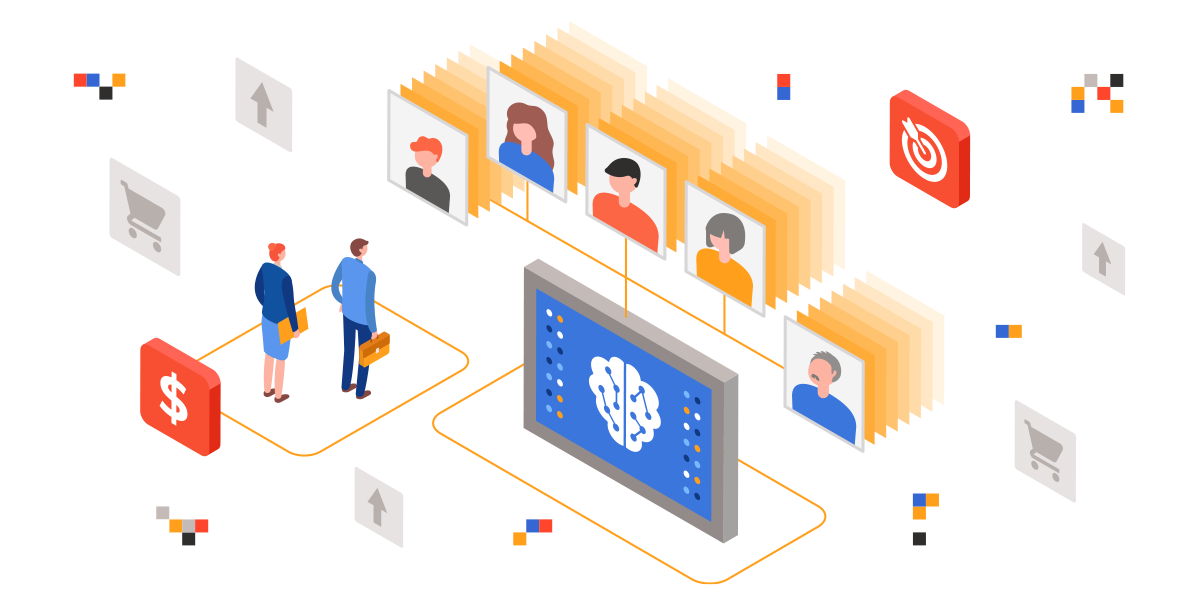

In [2]:
url = "https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
with urllib.request.urlopen(url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)

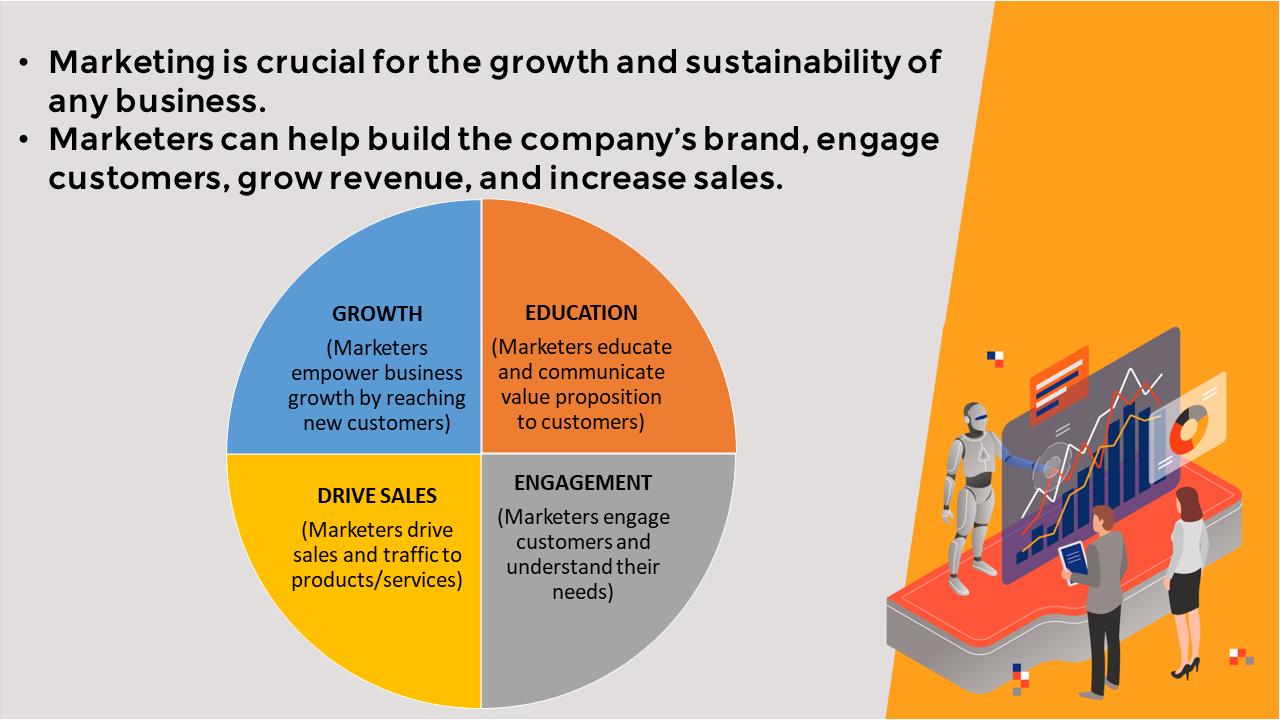

In [3]:
url = "https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise"
with urllib.request.urlopen(url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)

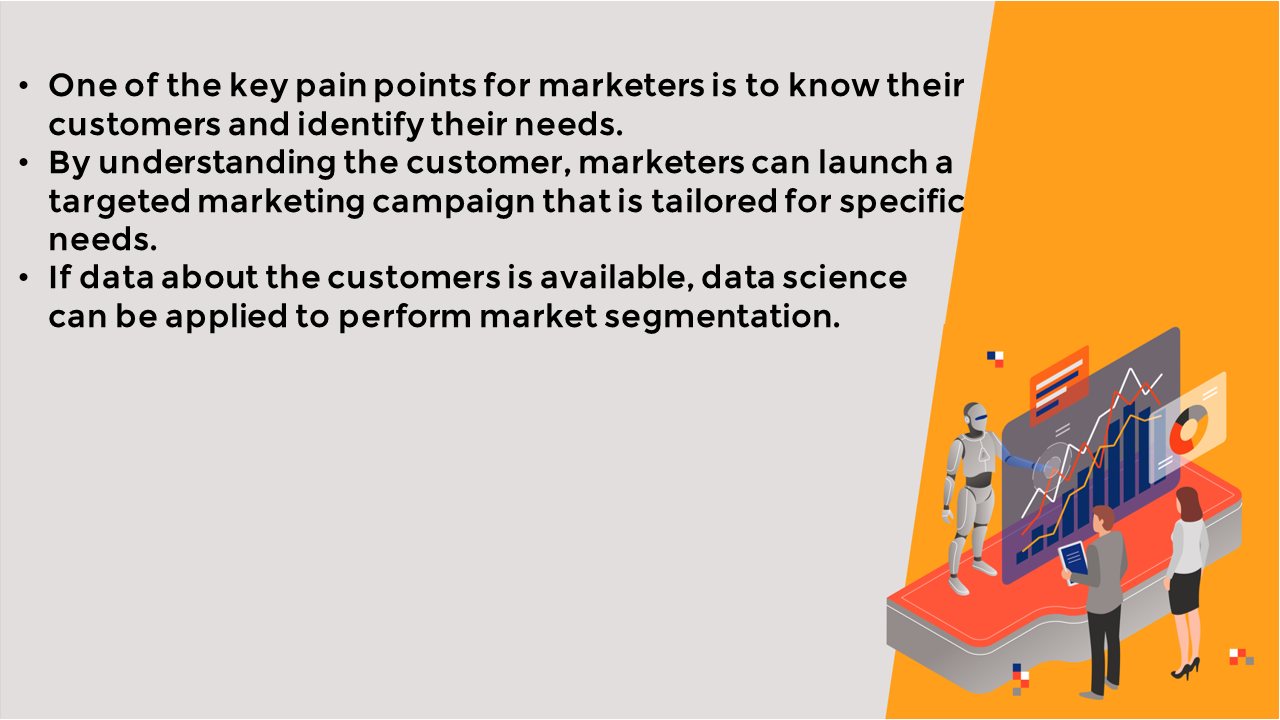

In [4]:
url = "https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8"
with urllib.request.urlopen(url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user
df = pd.read_csv('Marketing_data.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [4]:
df.shape

(8950, 18)

In [5]:
# Let's see who made one off purchase of $40761!
df[df['ONEOFF_PURCHASES']==40761.250000]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [6]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

df[df['CASH_ADVANCE']==47137.2117600000006]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

# TASK #3: VISUALIZE AND EXPLORE DATASET

<Axes: >

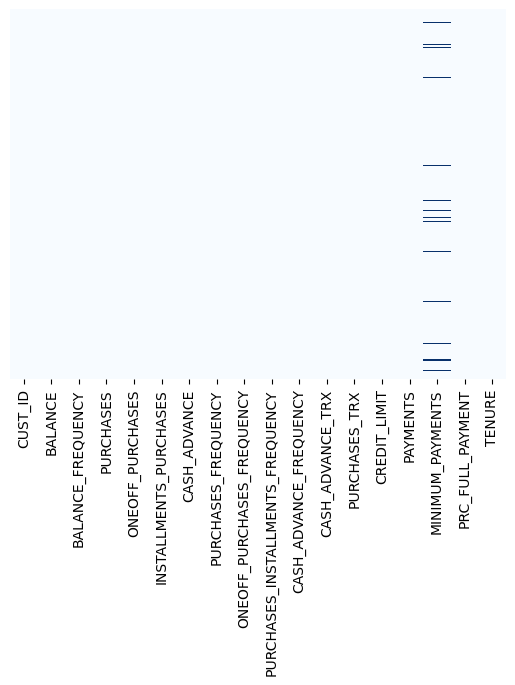

In [7]:
# Let's see if we have any missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [8]:
df.isnull().sum()/len(df)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [7]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
# df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [8]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

<Axes: >

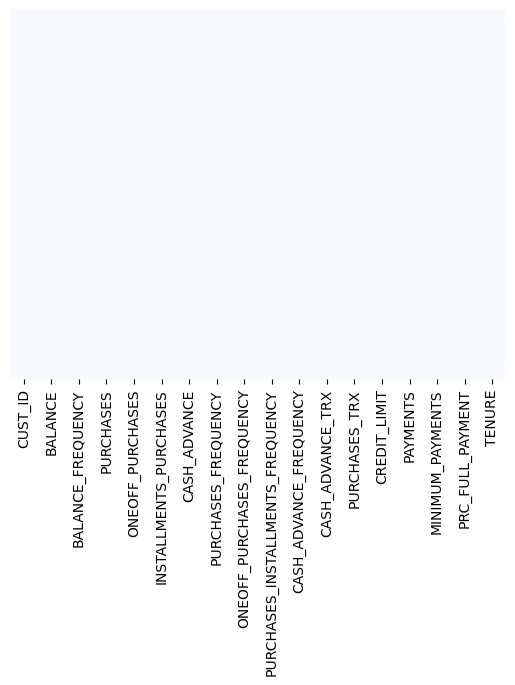

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [12]:
# check duplicate data-
df.duplicated().sum()

0

In [9]:
# Let's drop Customer ID since it has no meaning here
df.drop('CUST_ID',axis = 1,inplace = True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [14]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [15]:
for i, j in enumerate(df.columns, start=1):
    print(f"{i}: {j}")

1: BALANCE
2: BALANCE_FREQUENCY
3: PURCHASES
4: ONEOFF_PURCHASES
5: INSTALLMENTS_PURCHASES
6: CASH_ADVANCE
7: PURCHASES_FREQUENCY
8: ONEOFF_PURCHASES_FREQUENCY
9: PURCHASES_INSTALLMENTS_FREQUENCY
10: CASH_ADVANCE_FREQUENCY
11: CASH_ADVANCE_TRX
12: PURCHASES_TRX
13: CREDIT_LIMIT
14: PAYMENTS
15: MINIMUM_PAYMENTS
16: PRC_FULL_PAYMENT
17: TENURE


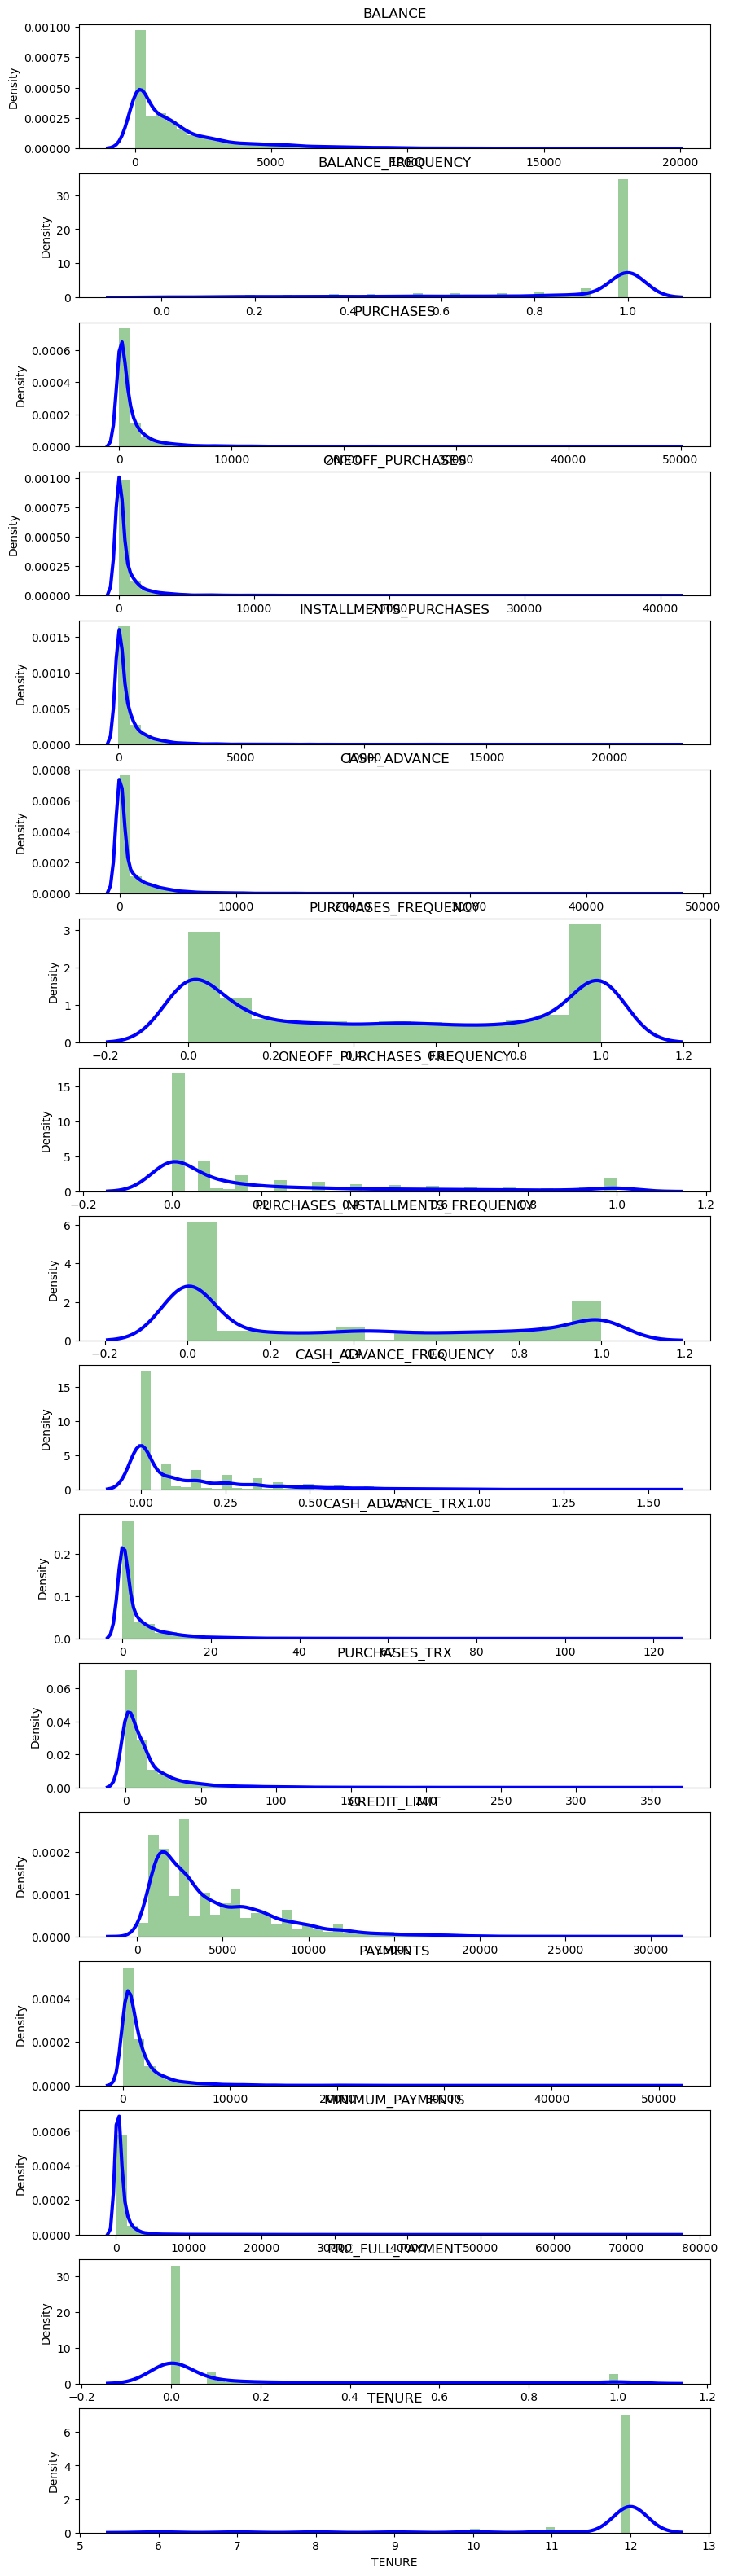

In [41]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure
plt.figure(figsize = (10,40))
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws = {'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
  

# for index, item in enumerate(my_list, start=1):
#     print(f"Serial Number {index}: {item}")

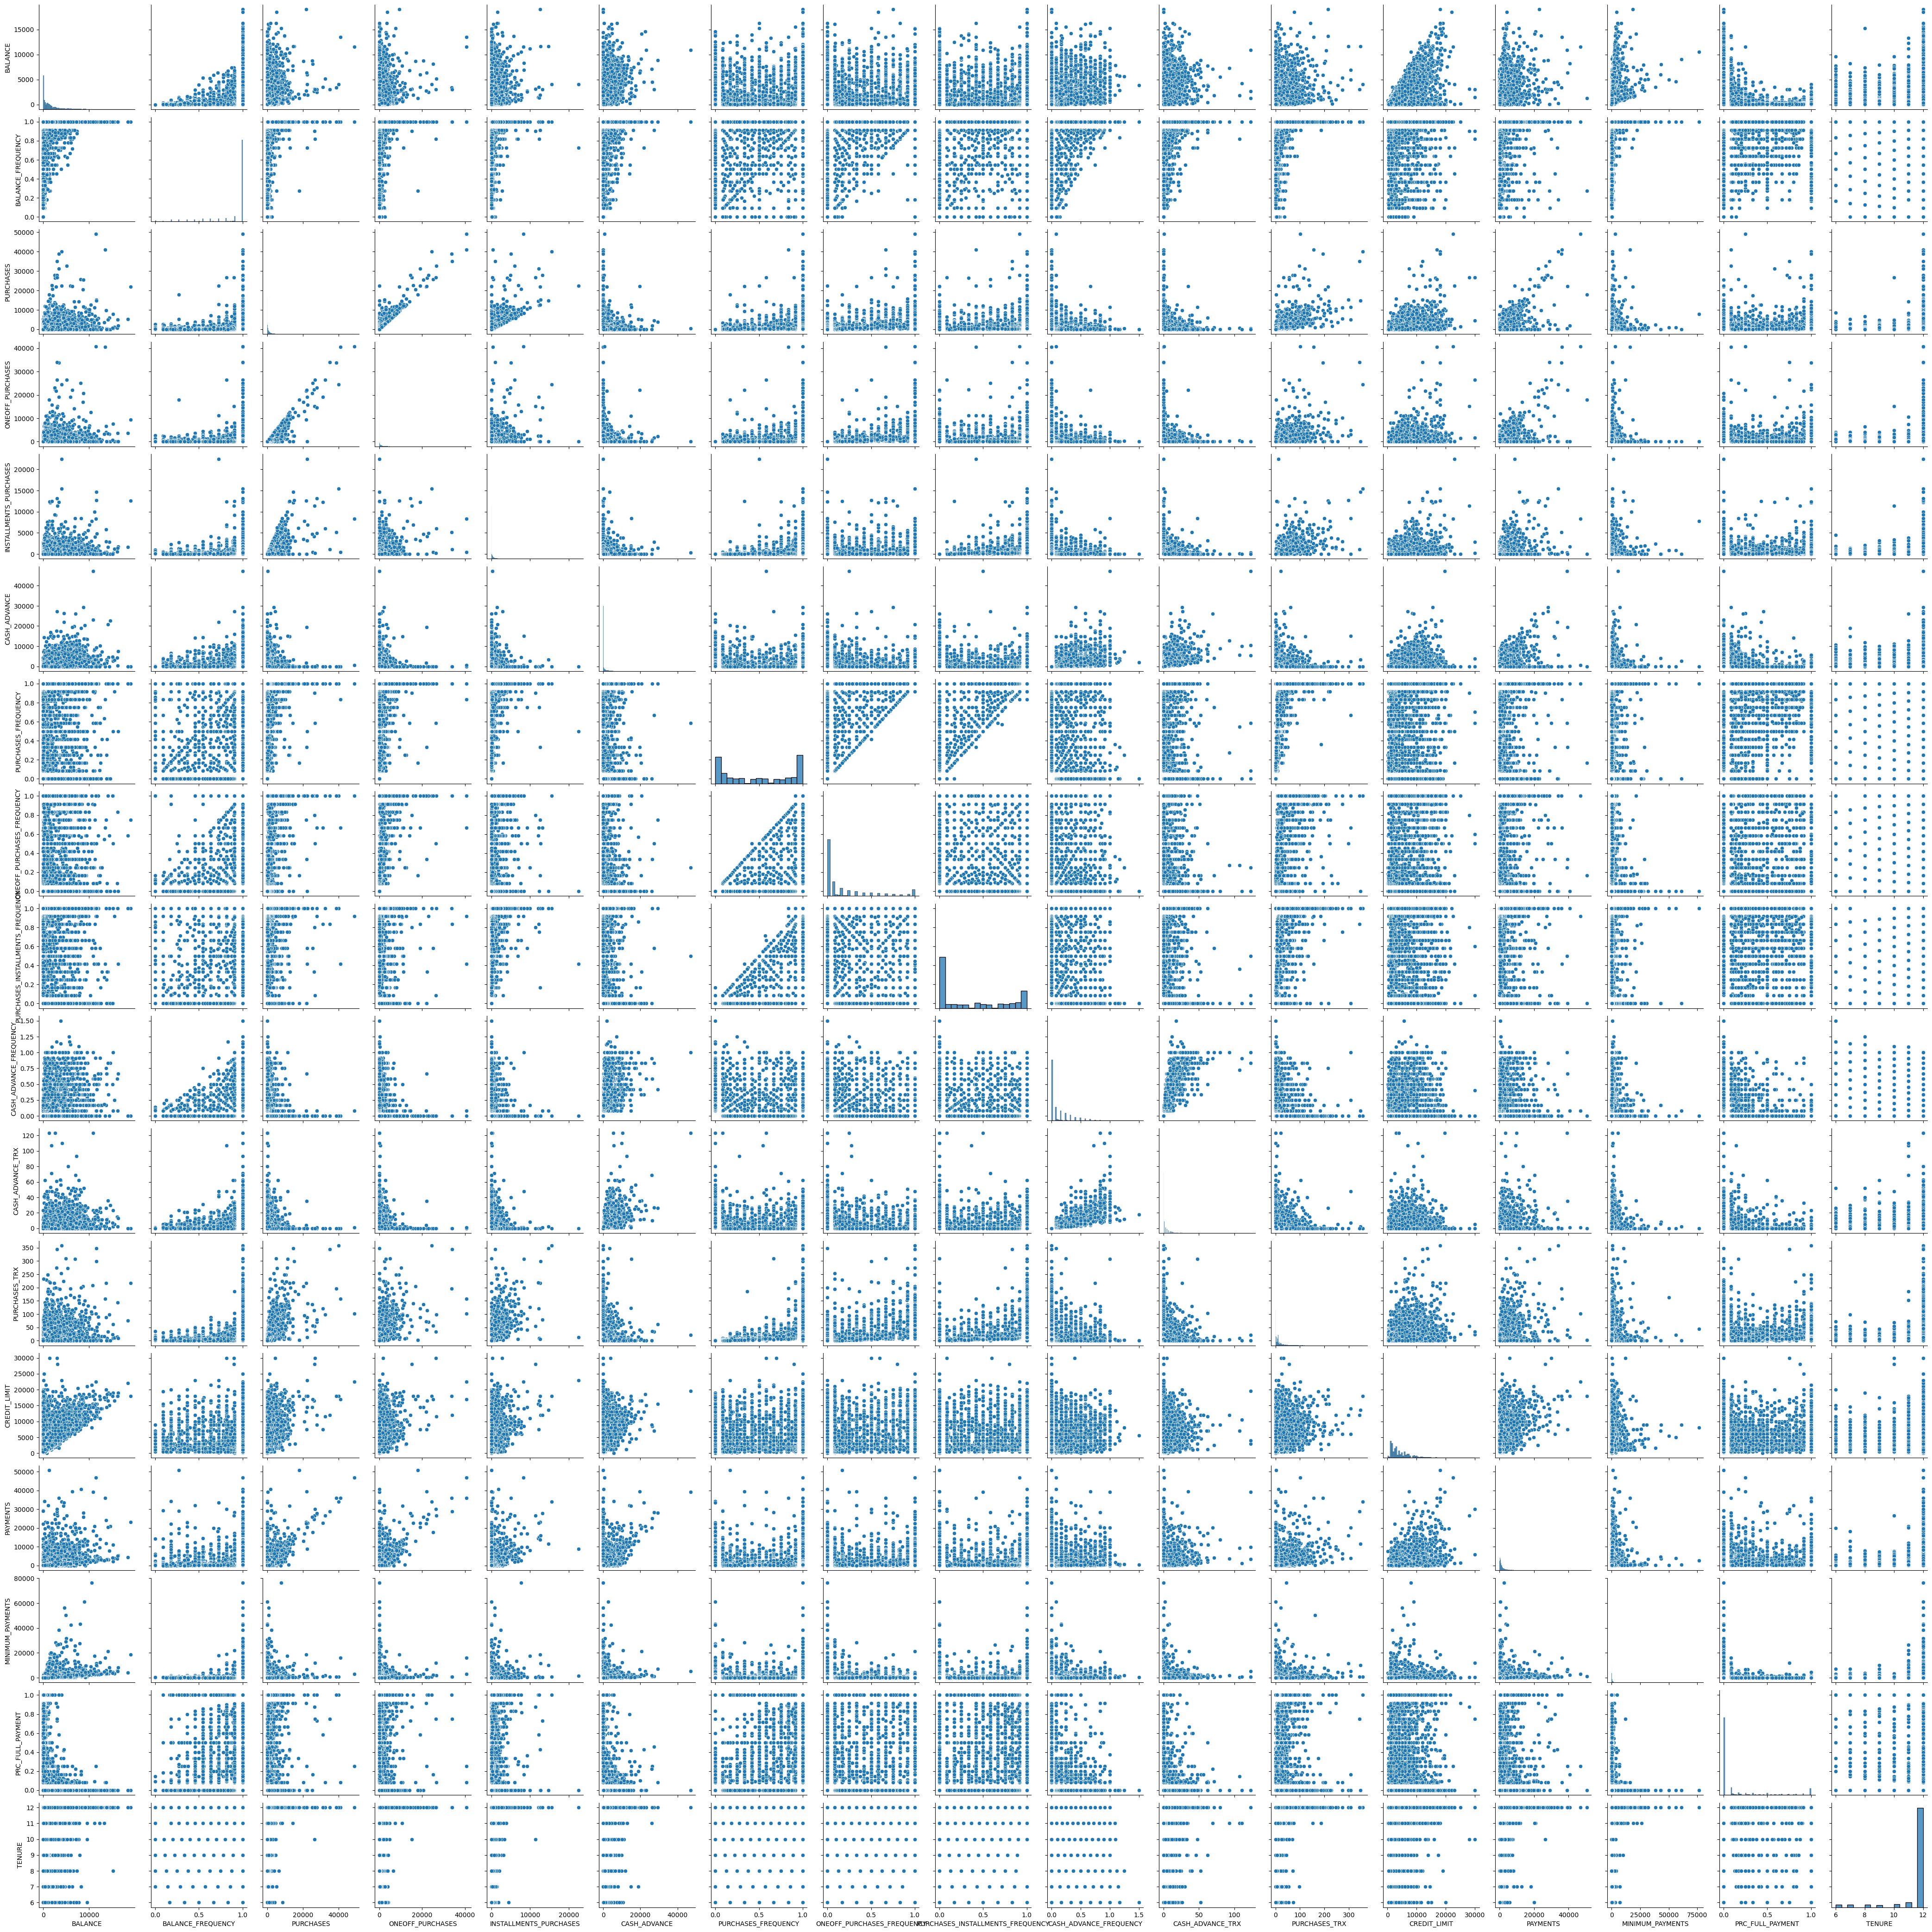

In [52]:
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
sns.pairplot(df)

<Axes: >

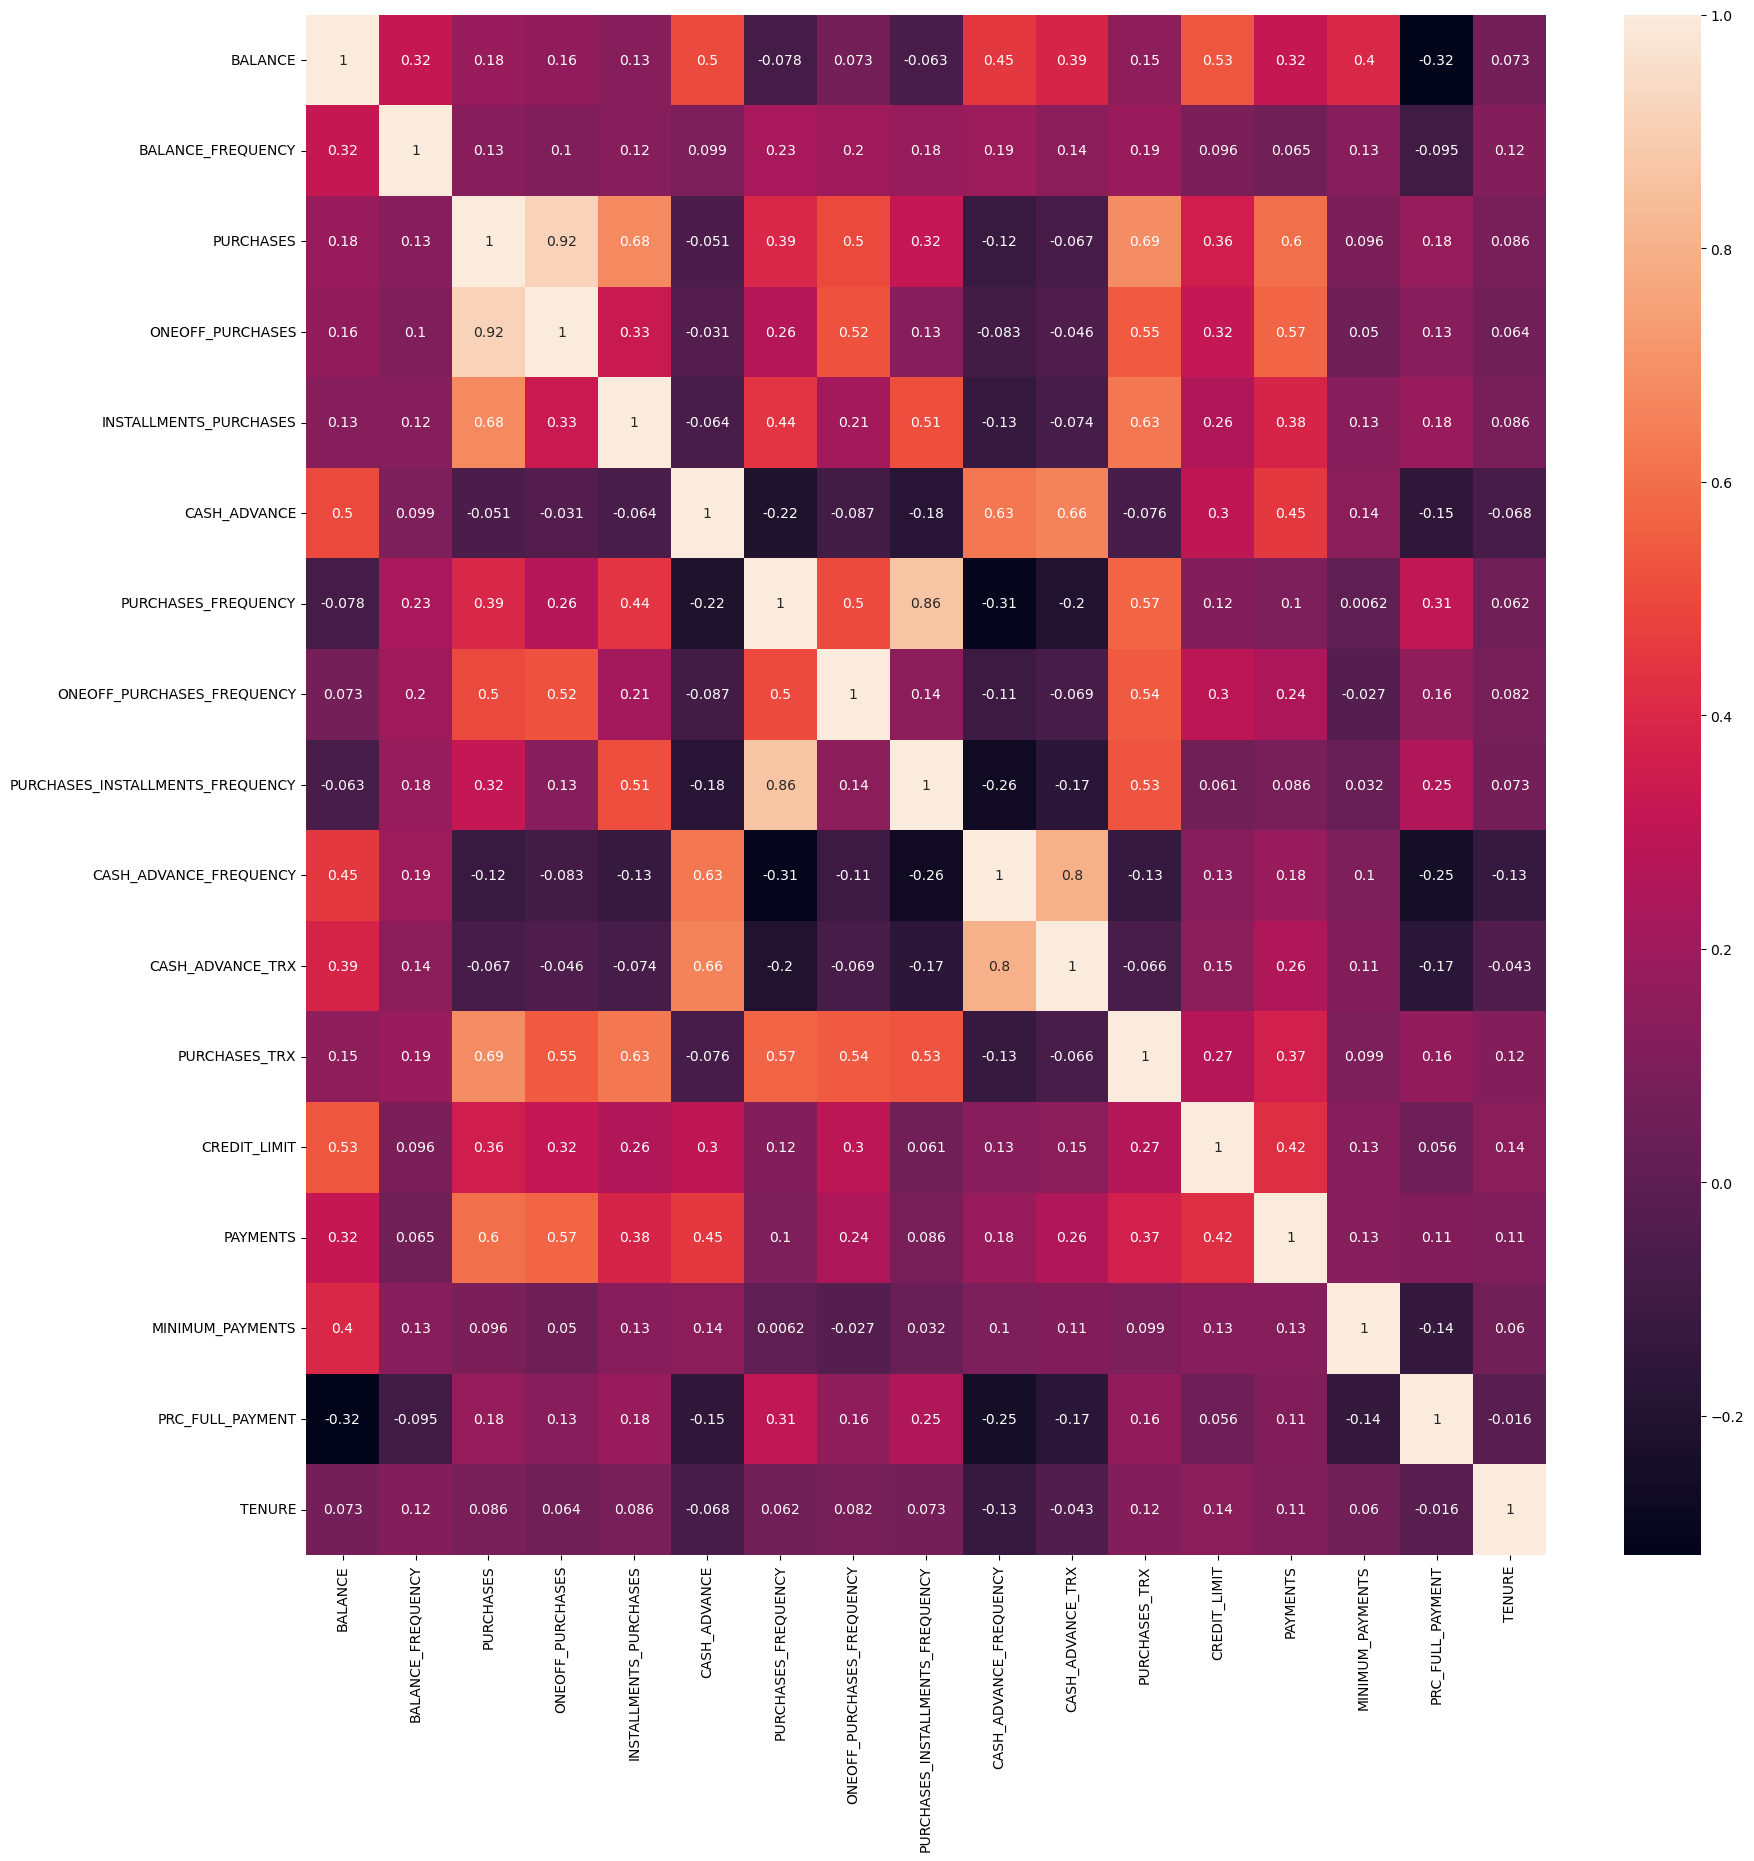

In [51]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)

# TASK #4: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [15]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [10]:
og = df.copy()

In [11]:
# Let's scale the data first
sc = StandardScaler()
x = sc.fit_transform(df)
df = pd.DataFrame(x,columns = df.columns)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.302400         -0.525551  0.36068  
1  0.818642          0.097500          0.234227  0.36068  
2 -0.383805         -0.093293         -0.525551  0.36068  
3 -0.598688         -0.228307         -0.525551  0.36068  
4 -0.364368         -0.257266         -0.525551  0.36068

WCSS (Within-Cluster-Sum-of-Squares):

WCSS measures the sum of squared distances between each data point and the centroid of its assigned cluster. 
In other words, it quantifies how compact the clusters are. The goal of K-means clustering is to minimize the WCSS.

Effect of Increasing Clusters:
When the number of clusters (K) is small, each cluster is relatively large, and the data points within each cluster 
are spread out. As you increase the number of clusters, the clusters become smaller, and the WCSS tends to decrease 
because each data point is closer to its cluster's centroid.

Elbow Point:
The Elbow Method suggests finding the point on the plot where the reduction in WCSS starts to slow down, forming an 
"elbow" shape. At this point, adding more clusters does not significantly improve the compactness of the clusters, and 
the marginal gain in reducing WCSS diminishes.

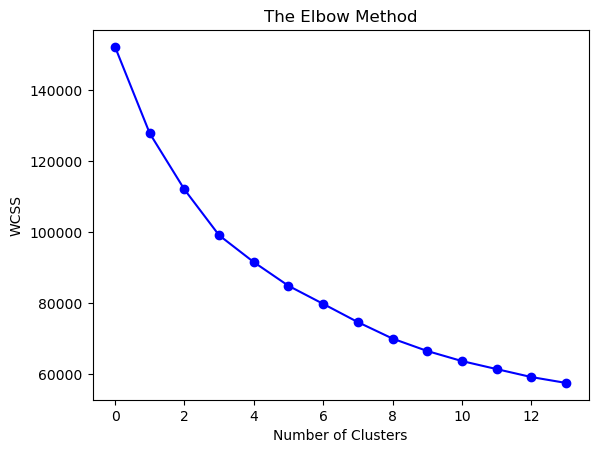

In [69]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# plt.plot(range(1,15),wcss)
plt.plot(wcss,'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


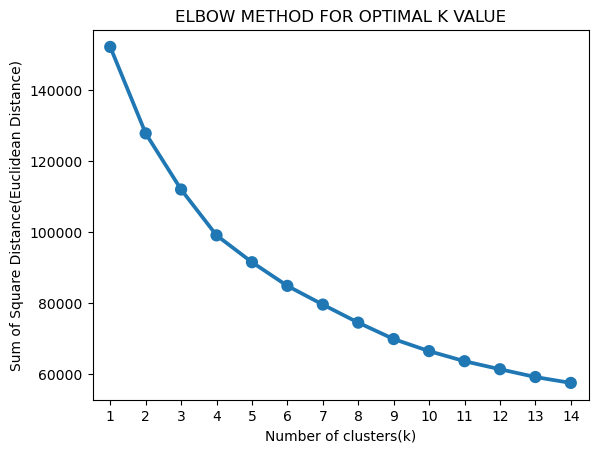

In [37]:
# another way - 
import seaborn as sns
from sklearn.cluster import KMeans
sum_of_sq_dist={}# just creating one variable of blank
for k in range(1,15):# giving by default 1 to 15 clusters
    #we can assign n_clusters=k , iteration becoz we use elbow method to find perfect k value.
    km=KMeans(n_clusters=k,init="k-means++",max_iter=300)
    km=km.fit(df)
    sum_of_sq_dist[k]=km.inertia_
    
sns.pointplot(x=list(sum_of_sq_dist.keys()),
             y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("ELBOW METHOD FOR OPTIMAL K VALUE")
plt.show()

In [ ]:
# judging by the wcss graph we can say cluster 4 or 5 are optimal clusters
# lets verify it by silhouette coefficient.

For n_clusters = 2 The average silhouette_score is : 0.5187191431323523
For n_clusters = 3 The average silhouette_score is : 0.5258882368115656
For n_clusters = 4 The average silhouette_score is : 0.5095902864439206
For n_clusters = 5 The average silhouette_score is : 0.5343157995086086
For n_clusters = 6 The average silhouette_score is : 0.5321178608895946
For n_clusters = 7 The average silhouette_score is : 0.43921561575374357


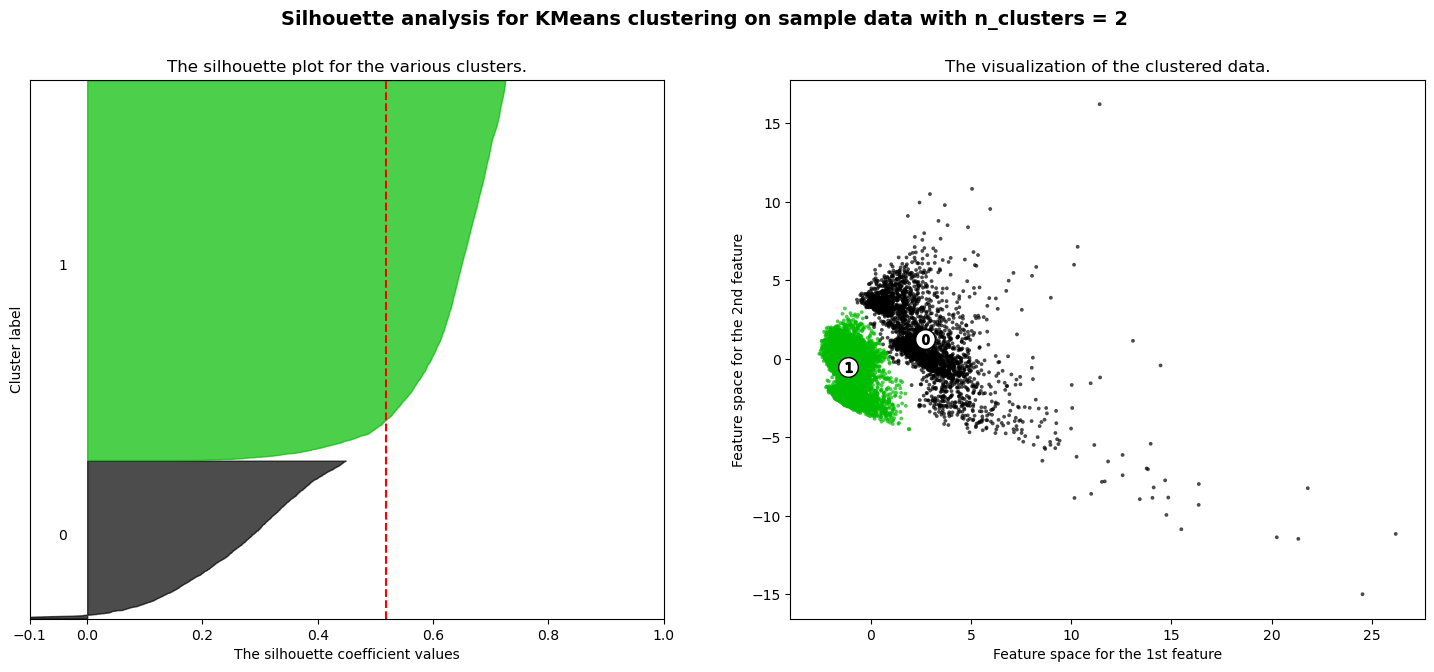

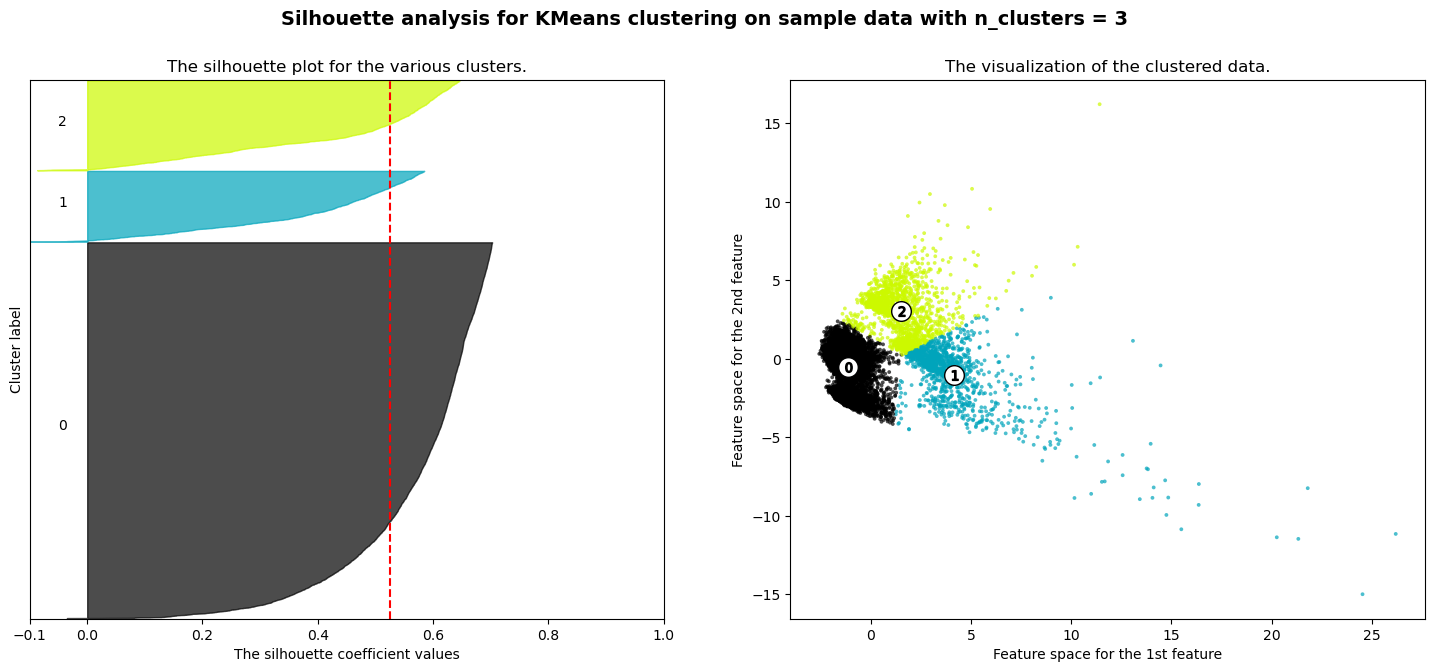

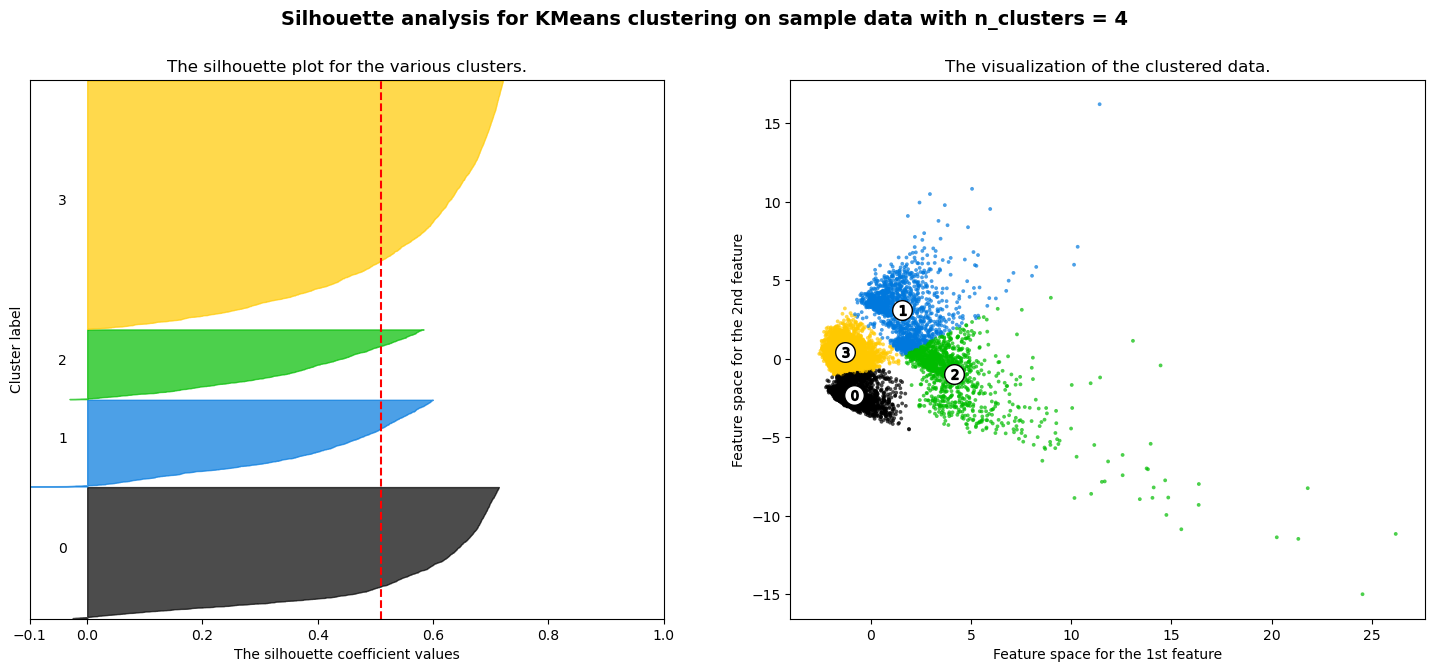

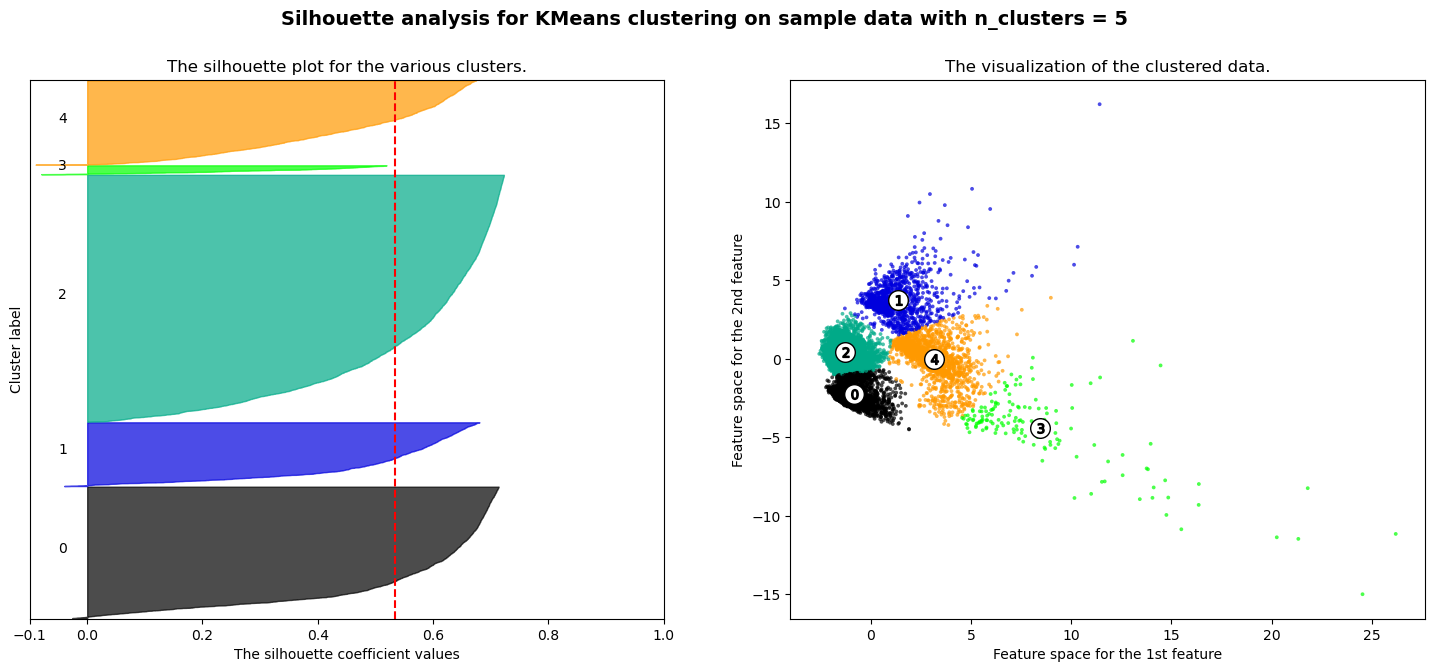

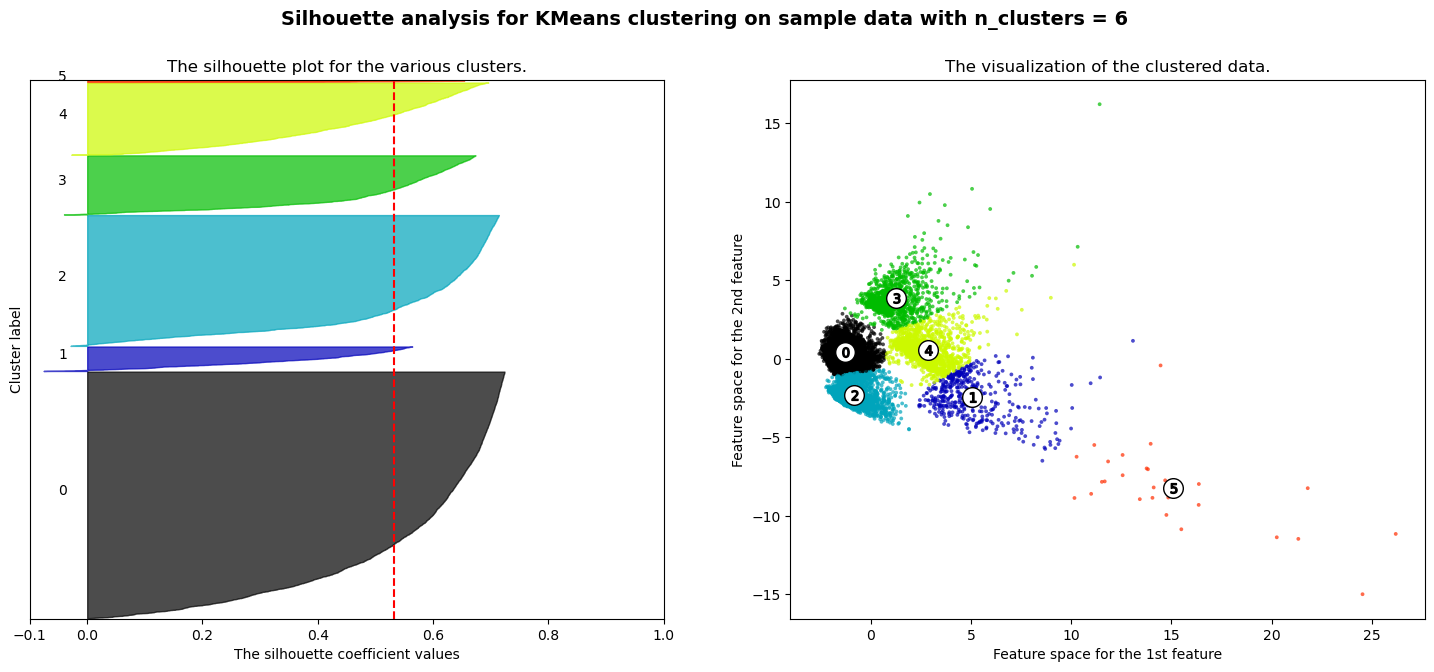

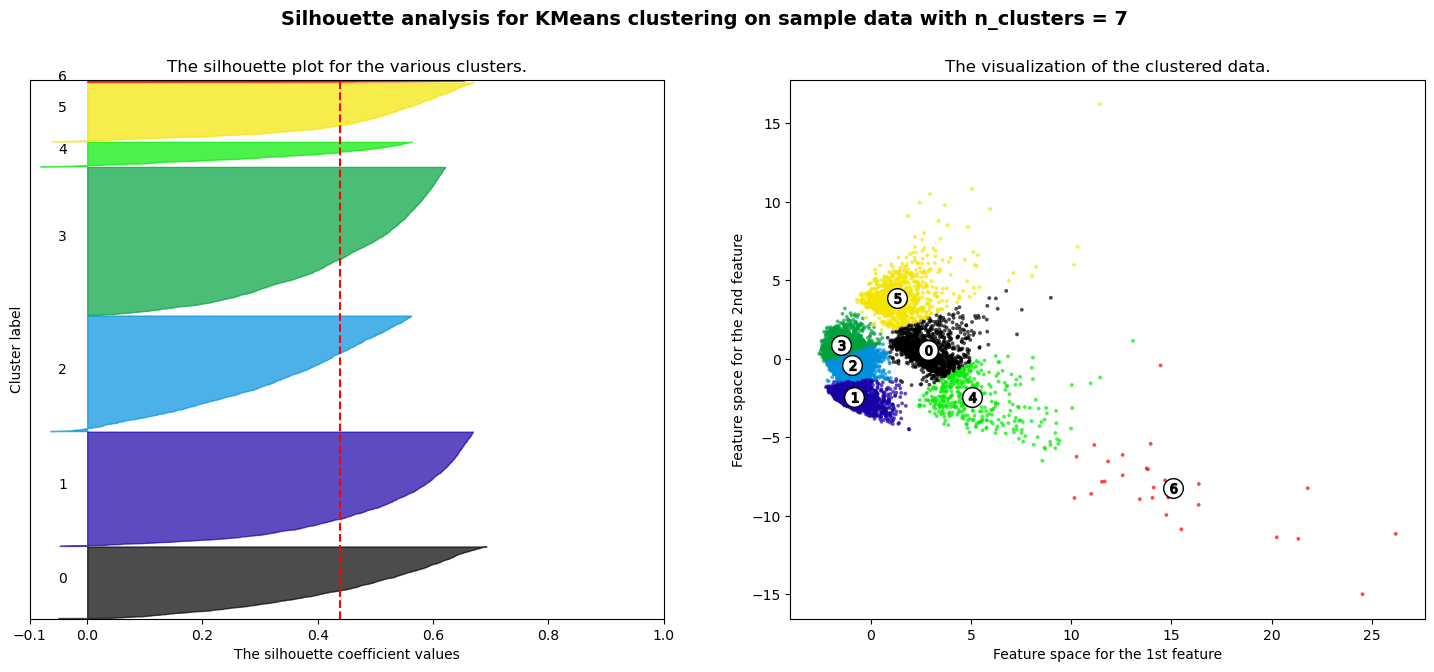

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)
# df_reduced = df.copy()
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_reduced) + (n_clusters + 1) * 10])

    clusters = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusters.fit_predict(df_reduced)

    silhouette_avg = silhouette_score(df_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # if not using pca - df_reduced.iloc[:, 0], df_reduced.iloc[:, 1]
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusters.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


For n_clusters = 2 The average silhouette_score is : 0.4402303218626162


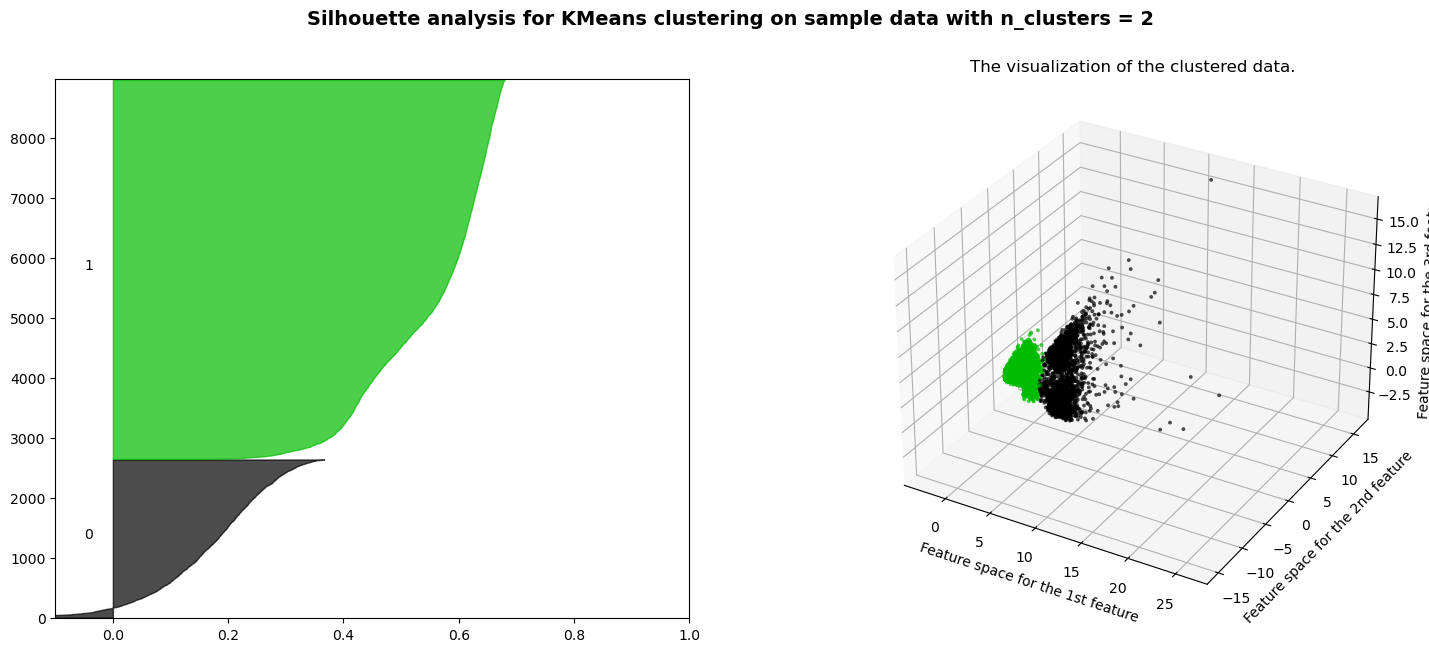

For n_clusters = 3 The average silhouette_score is : 0.4797336386928473


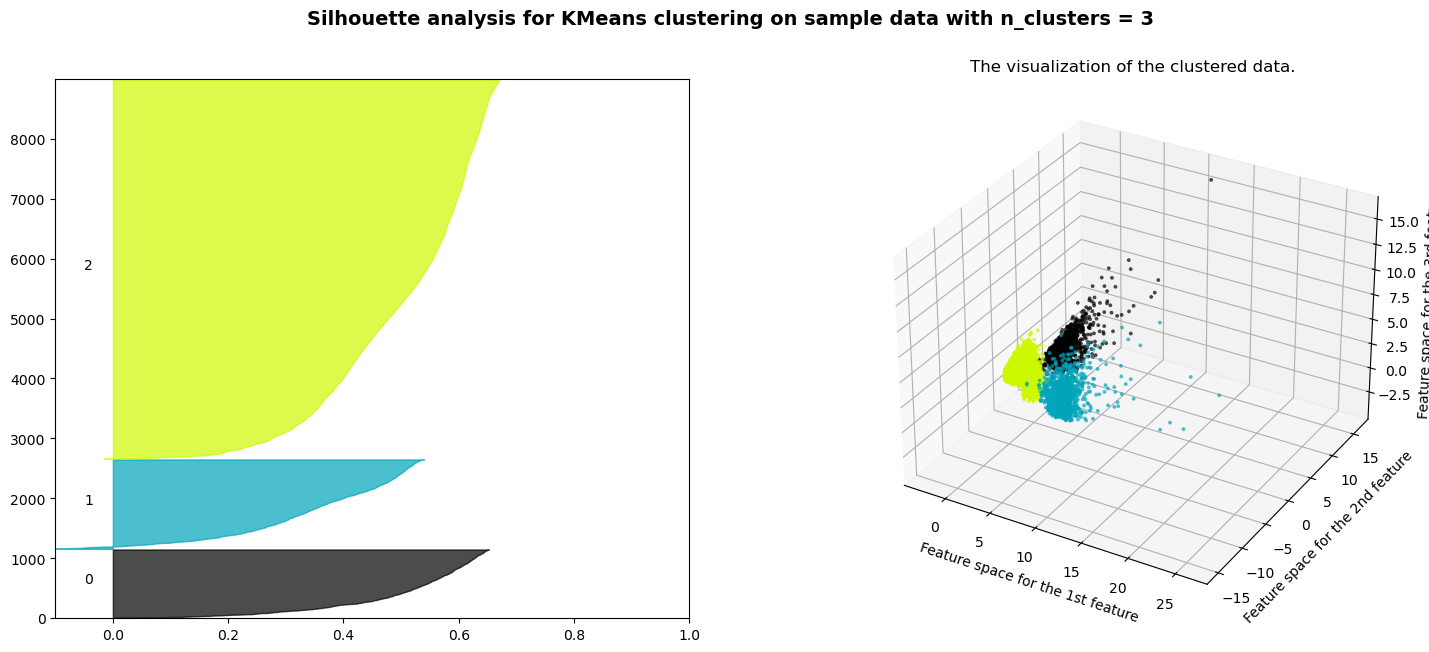

For n_clusters = 4 The average silhouette_score is : 0.417030891256024


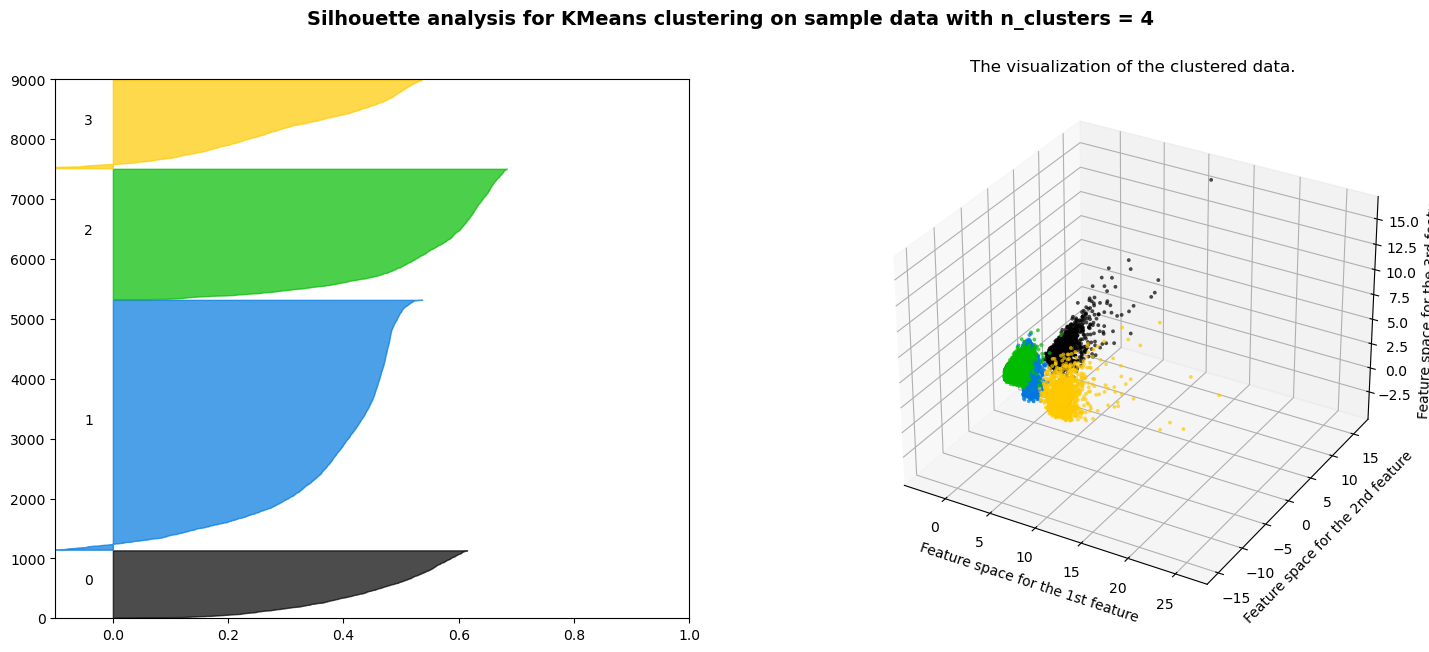

For n_clusters = 5 The average silhouette_score is : 0.44264938387826047


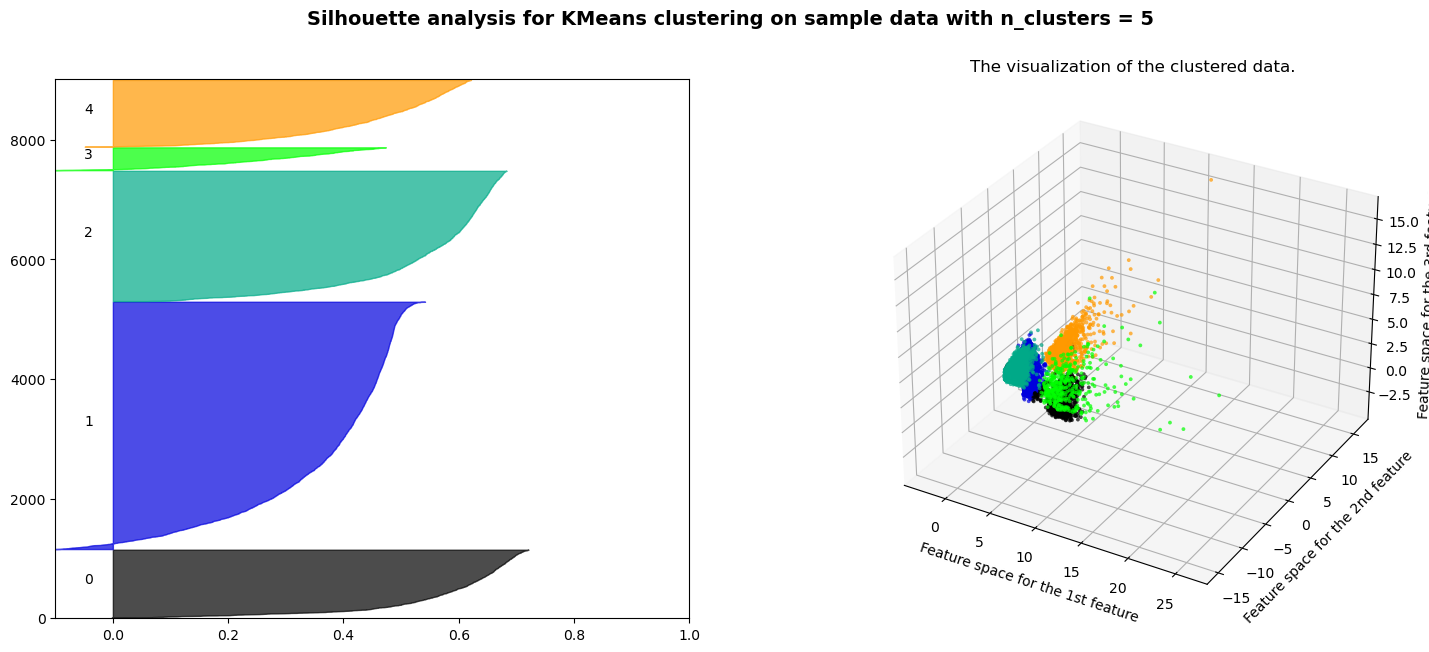

For n_clusters = 6 The average silhouette_score is : 0.49362196788217405


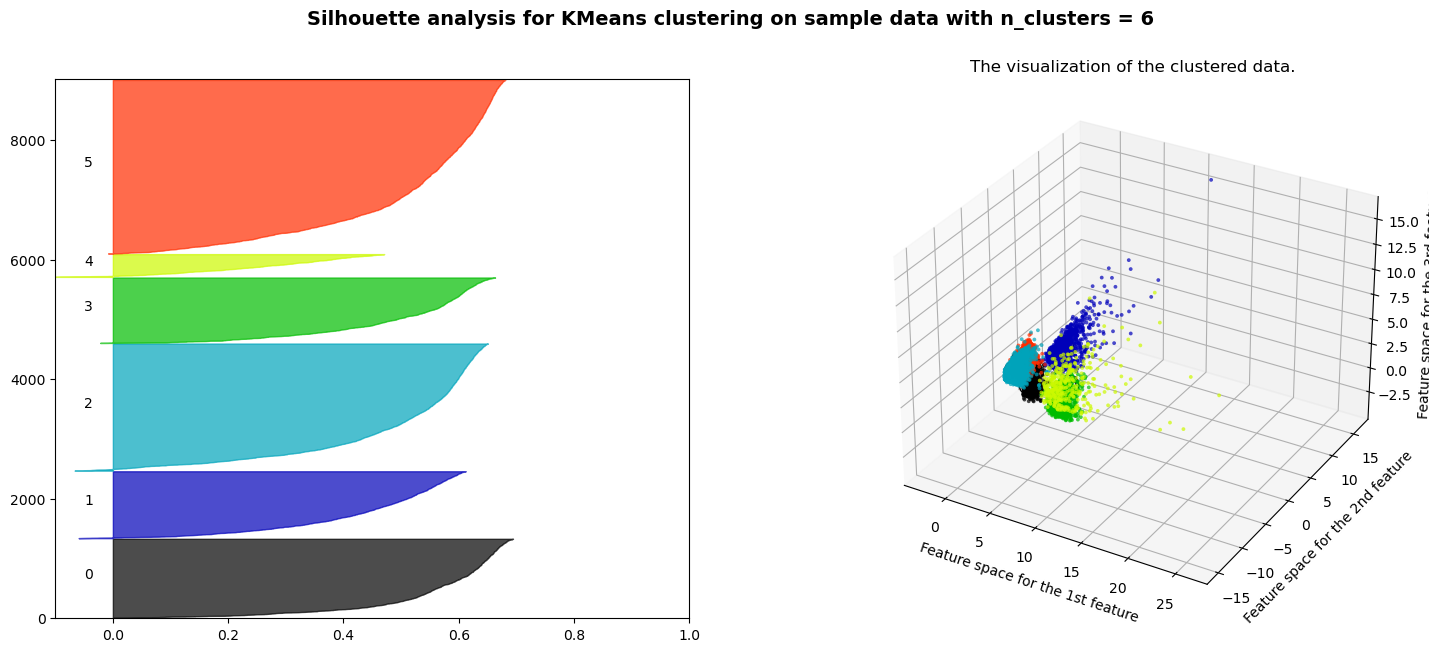

For n_clusters = 7 The average silhouette_score is : 0.4983770599444776


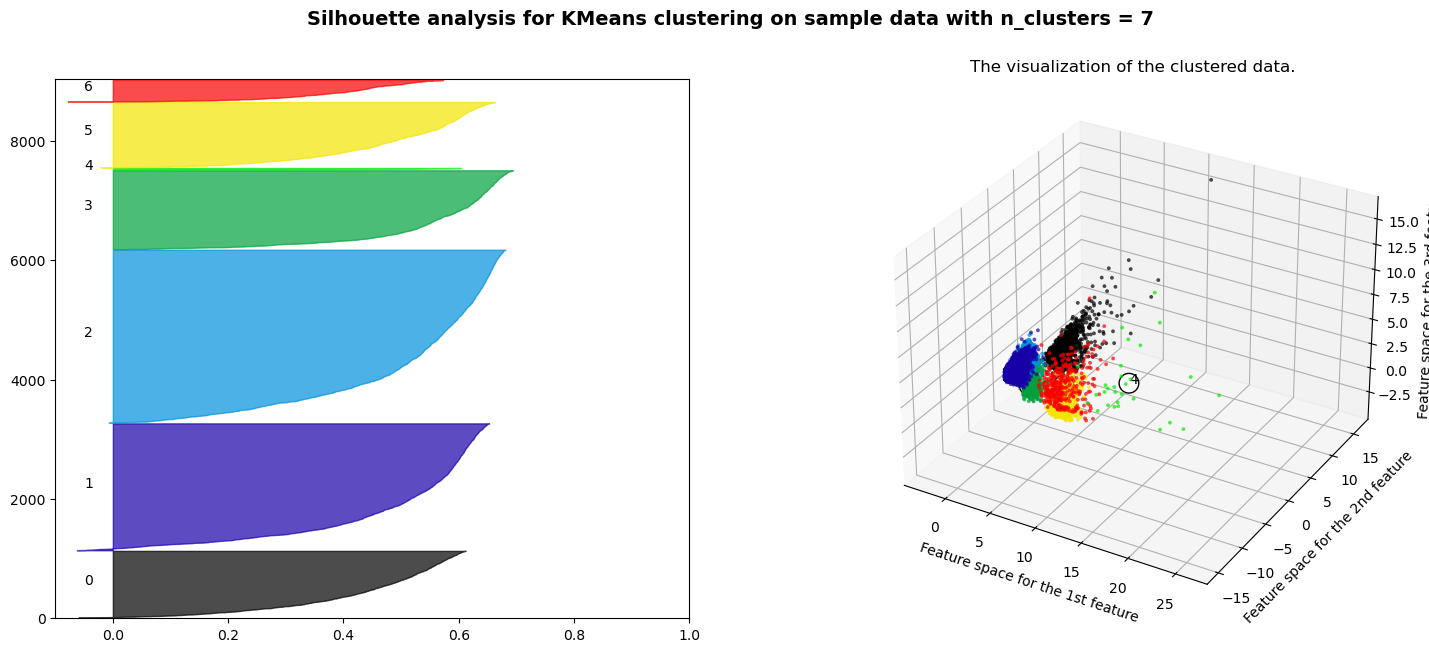

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Assuming df contains your data with at least 3 features

pca = PCA(n_components=3)
df_reduced = pca.fit_transform(df)

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure(figsize=(18, 7))
    
    # The 1st subplot is the silhouette plot
    ax1 = fig.add_subplot(121)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_reduced) + (n_clusters + 1) * 10])

    clusters = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusters.fit_predict(df_reduced)

    silhouette_avg = silhouette_score(df_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    # The 2nd subplot is the 3D scatter plot
    ax2 = fig.add_subplot(122, projection='3d')
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_reduced[:, 0], df_reduced[:, 1], df_reduced[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    centers = clusters.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.text(c[0], c[1], c[2], s=str(i), color='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.zaxis.set_label_text("Feature space for the 3rd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


# TASK #5: APPLY K-MEANS METHOD

In [12]:
kmeans = KMeans(4)
kmeans.fit(df)
labels = kmeans.labels_

In [13]:
labels

array([1, 3, 0, ..., 0, 1, 1])

In [14]:
kmeans.cluster_centers_.shape

(4, 17)

In [36]:
# Accessing cluster centers
centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(centers)

Cluster Centers:
[[-0.3162599   0.25328442  0.11707956  0.0062568   0.26510634 -0.36517279
   0.98948086  0.32725132  0.87915299 -0.46116463 -0.35950517  0.30729121
  -0.06901416 -0.13228641 -0.08500177  0.39803265  0.06035721]
 [-0.27046923 -0.37609745 -0.34206831 -0.230193   -0.38571256 -0.18652812
  -0.78837988 -0.38806503 -0.70592735 -0.10887948 -0.17014396 -0.47280597
  -0.33579962 -0.26381272 -0.12629987 -0.25692967 -0.05283137]
 [ 1.44927875  0.38537496 -0.24008114 -0.16935466 -0.25662097  1.67145237
  -0.51470299 -0.22055903 -0.45760327  1.73897126  1.60813112 -0.2892963
   0.82608952  0.59447486  0.49173595 -0.40639333 -0.09878115]
 [ 0.97545622  0.4666898   3.18855026  2.78384832  2.42509544 -0.13490058
   1.13562512  1.81226004  1.06482564 -0.31055537 -0.15450489  3.04517581
   1.44380211  1.96208786  0.48997968  0.45930253  0.32294009]]


In [15]:
cluster_df = pd.DataFrame(data = kmeans.cluster_centers_,columns=[df.columns])
cluster_df

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.316260          0.253284  0.117080         0.006257   
1 -0.270469         -0.376097 -0.342068        -0.230193   
2  0.975456          0.466690  3.188550         2.783848   
3  1.449279          0.385375 -0.240081        -0.169355   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.265106    -0.365173            0.989481   
1              -0.385713    -0.186528           -0.788380   
2               2.425095    -0.134901            1.135625   
3              -0.256621     1.671452           -0.514703   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.327251                         0.879153   
1                  -0.388065                        -0.705927   
2                   1.812260                         1.064826   
3                  -0.220559                        -0.457603   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.461165        -0.359505      0.307291    -0.069014   
1              -0.108879        -0.170144     -0.472806    -0.335800   
2              -0.310555        -0.154505      3.045176     1.443802   
3               1.738971         1.608131     -0.289296     0.826090   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.132286        -0.085002         0.398033  0.060357  
1 -0.263813        -0.126300        -0.256930 -0.052831  
2  1.962088         0.489980         0.459303  0.322940  
3  0.594475         0.491736        -0.406393 -0.098781

In [16]:
dfc = pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
dfc.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  cluster  
0 -0.528979         -0.302400         -0.525551  0.36068        1  
1  0.818642          0.097500          0.234227  0.36068        3  
2 -0.383805         -0.093293         -0.525551  0.36068        0  
3 -0.598688         -0.228307         -0.525551  0.36068        1  
4 -0.364368         -0.257266         -0.525551  0.36068        1

In [17]:
# original data
p = og.copy()
dfo = pd.concat([p,pd.DataFrame({'cluster':labels})],axis=1)
dfo.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        312.343947          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

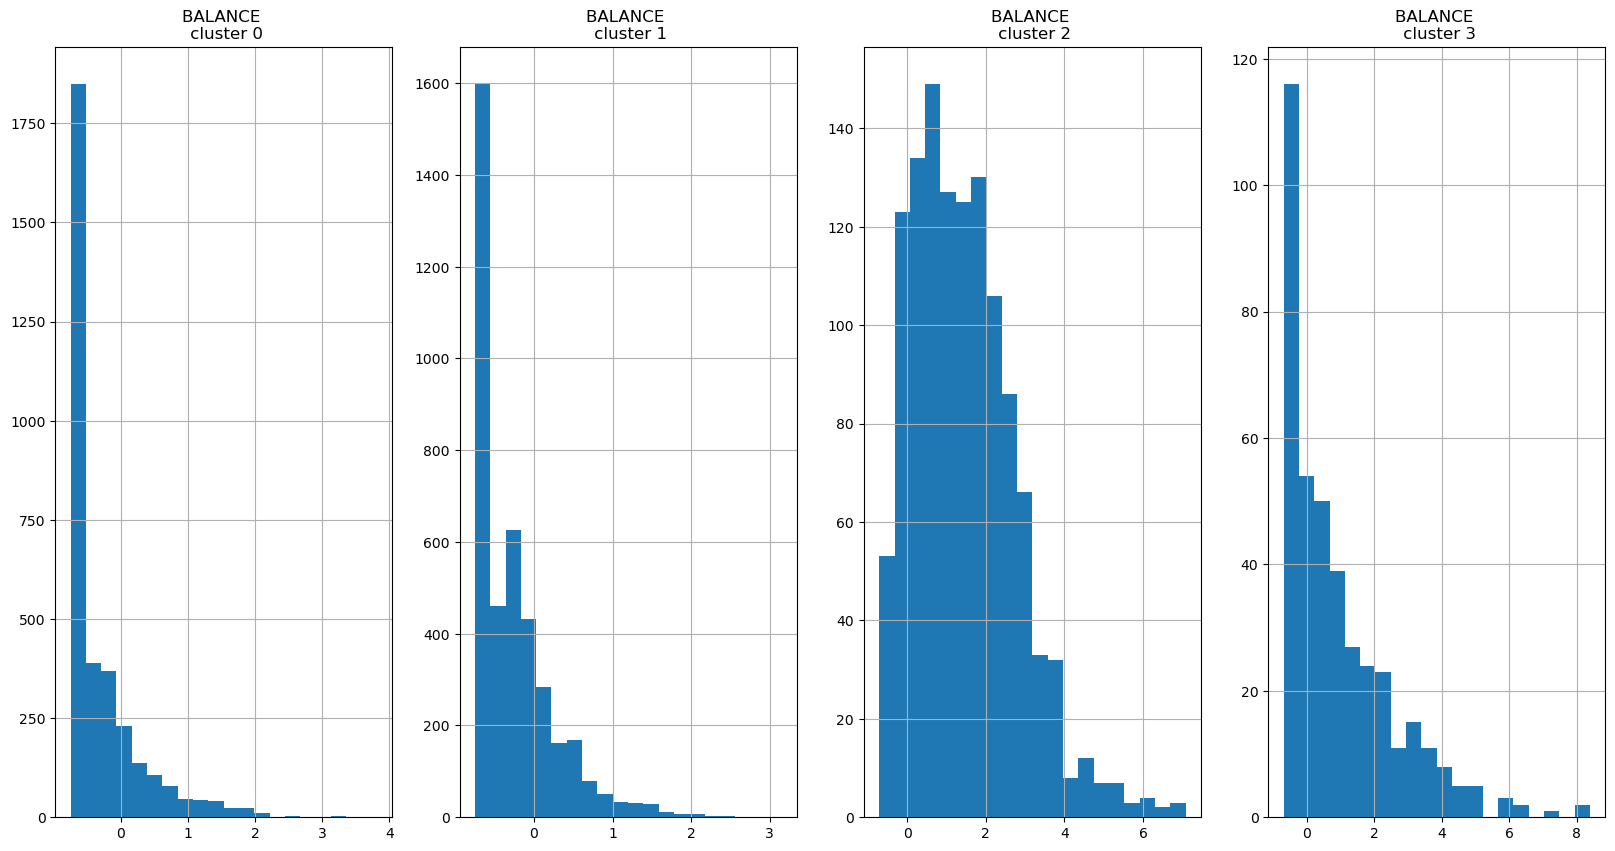

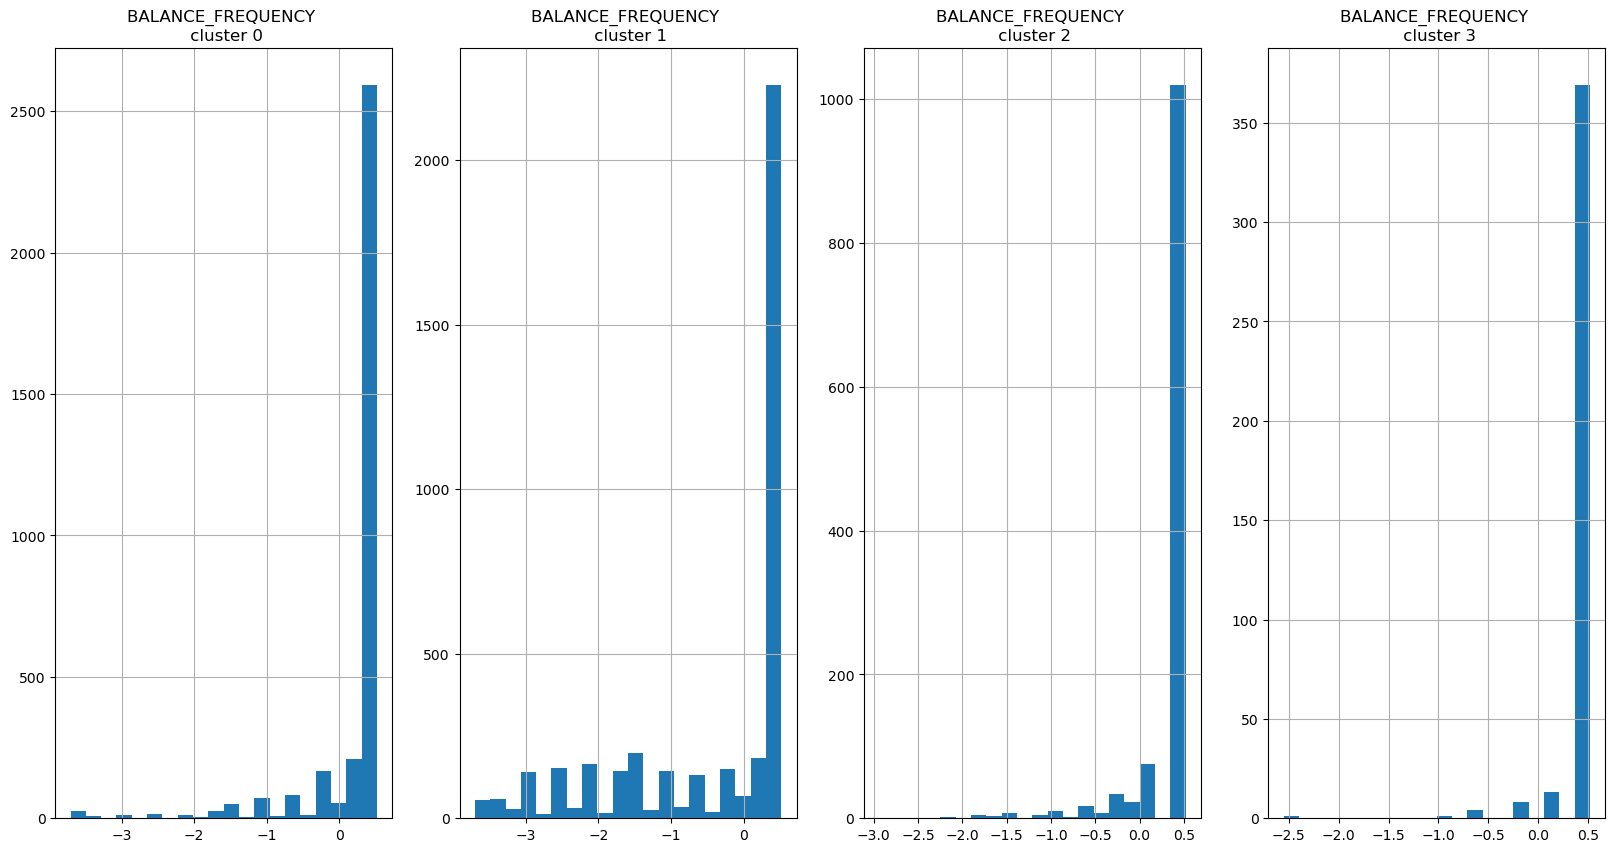

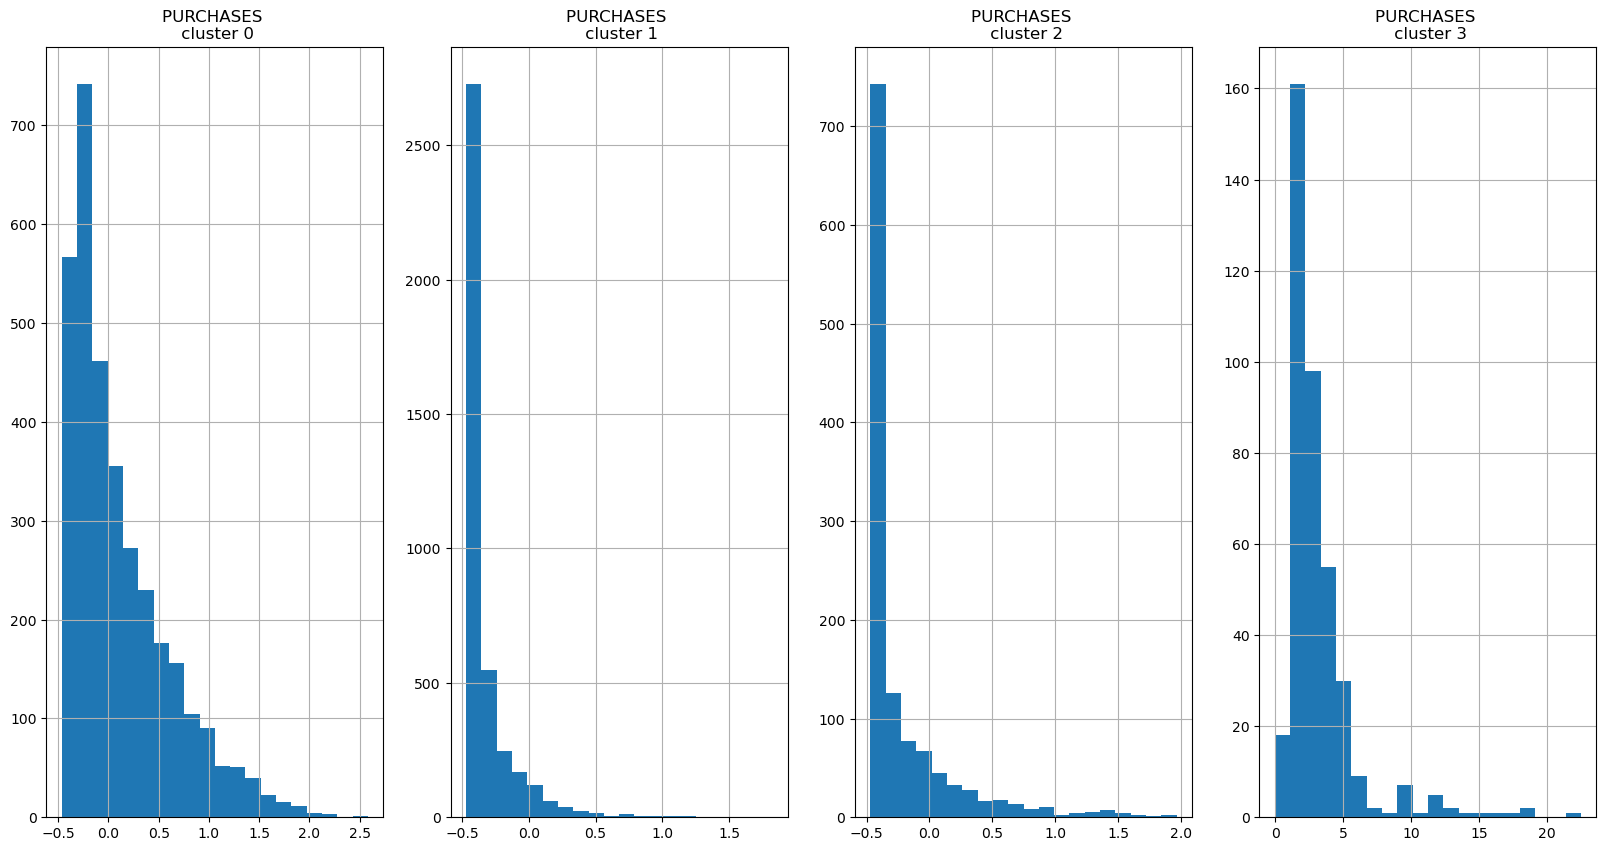

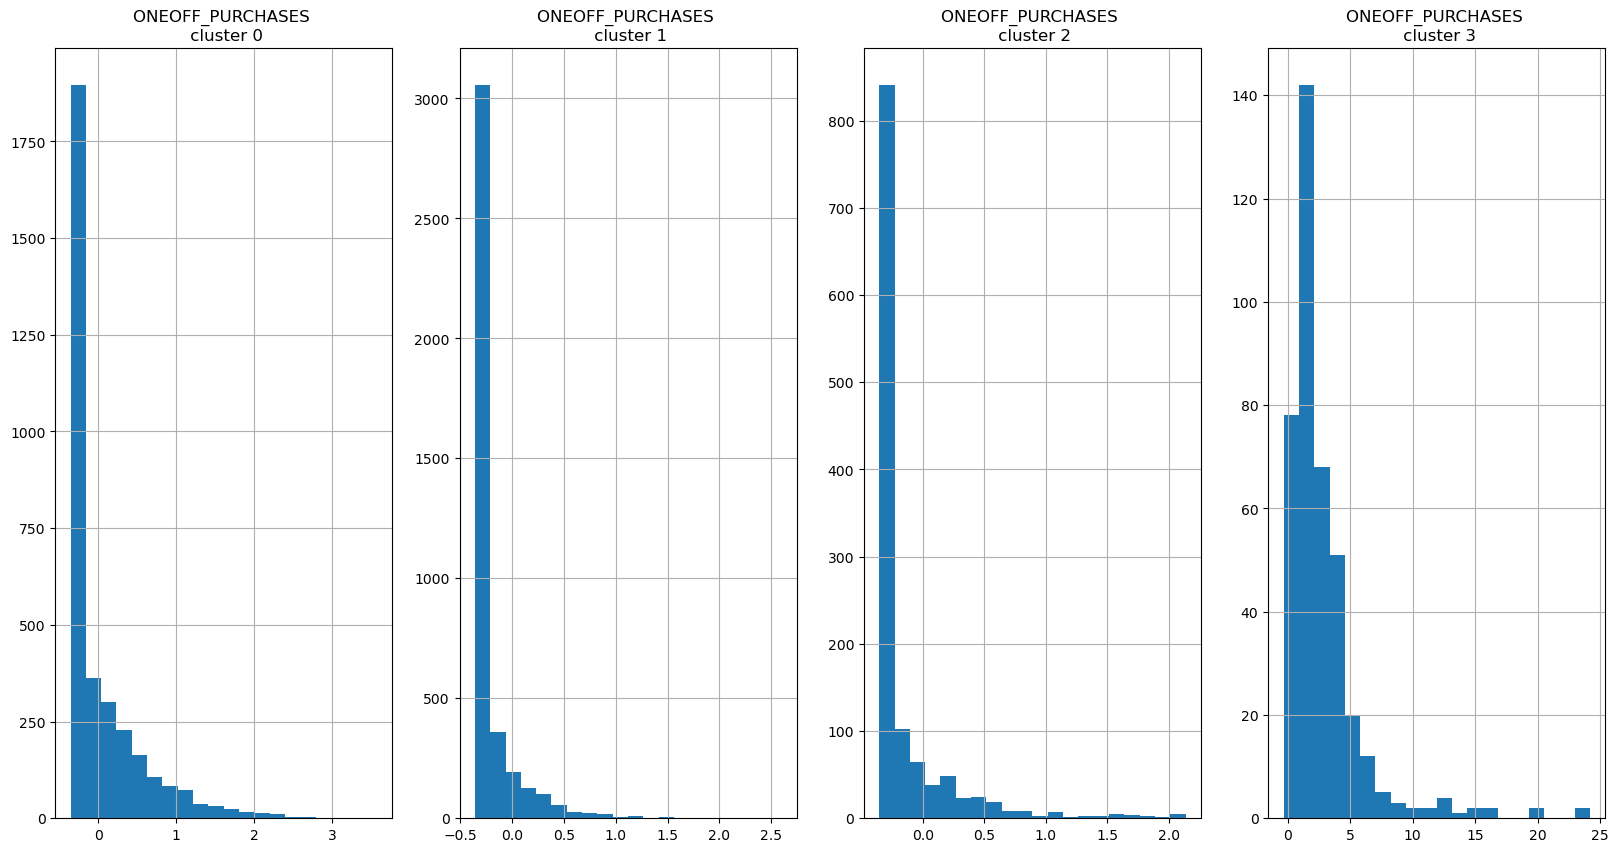

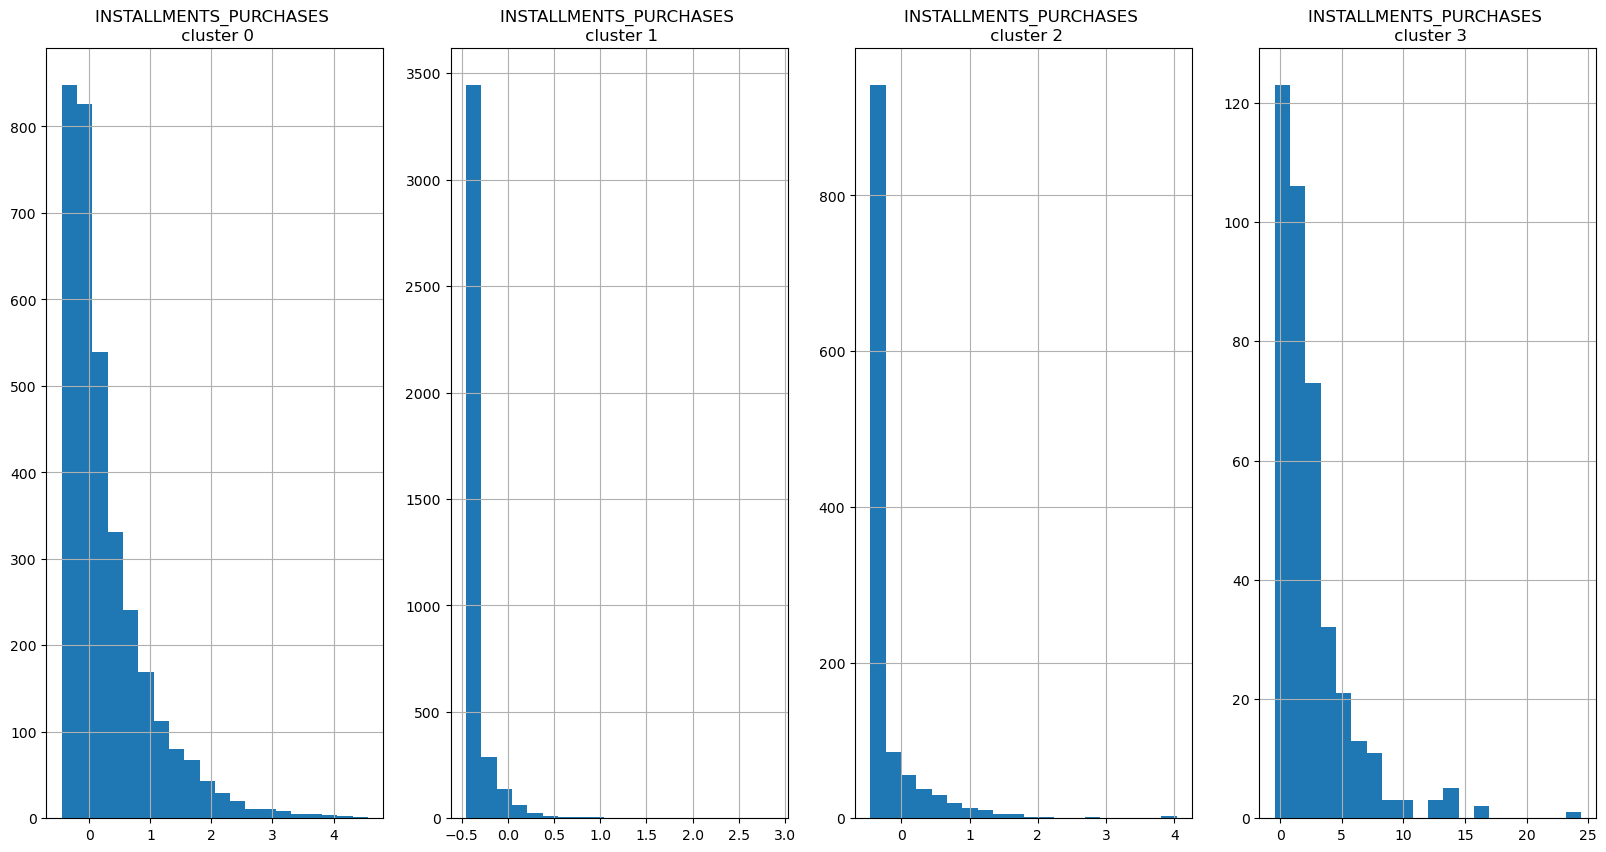

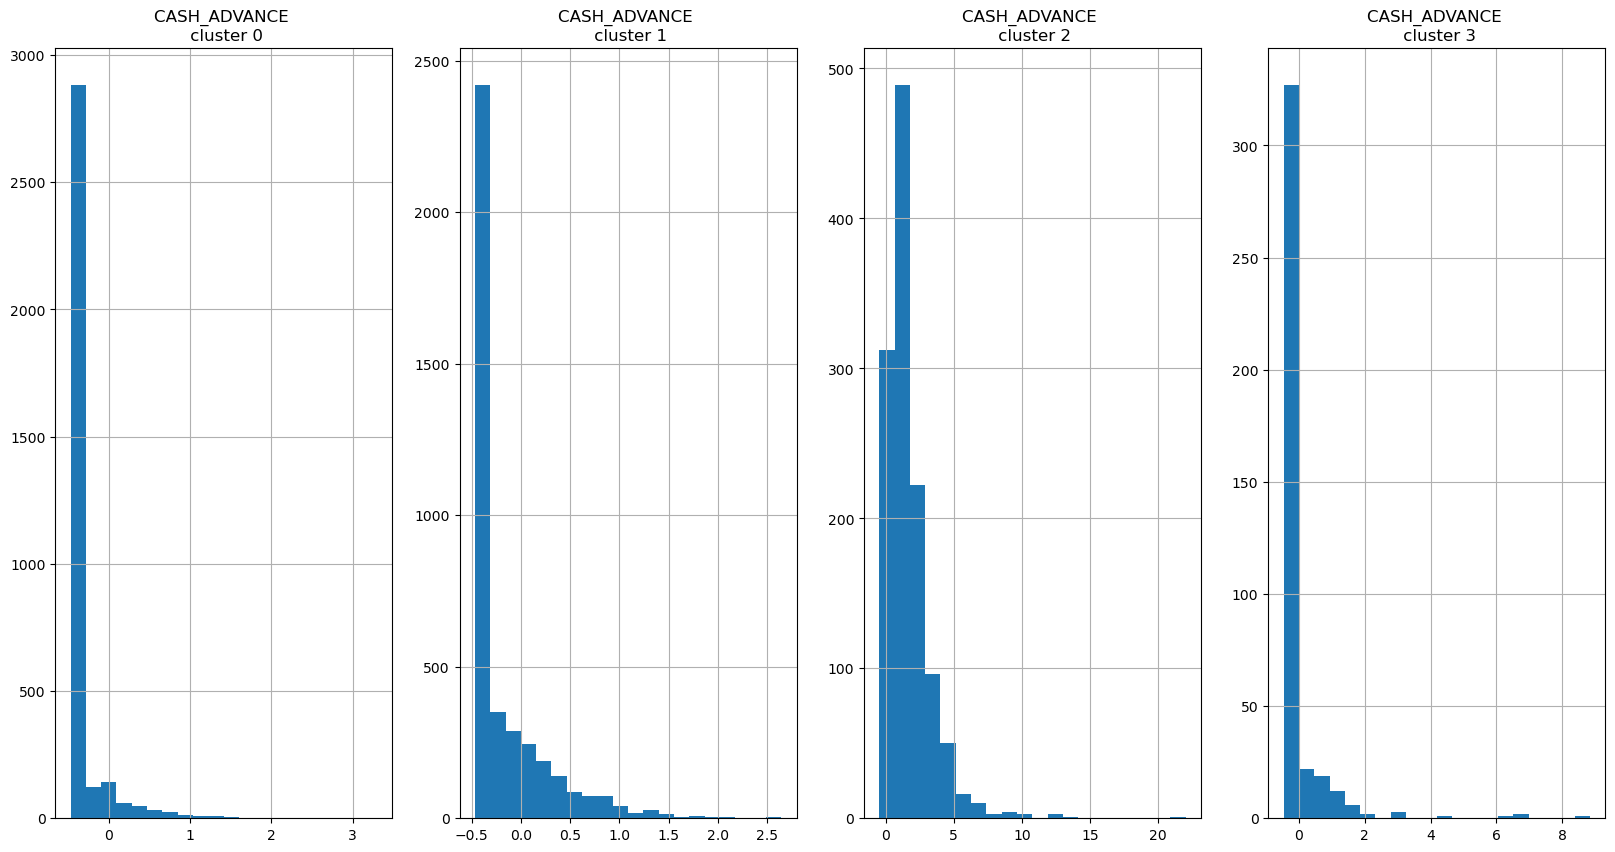

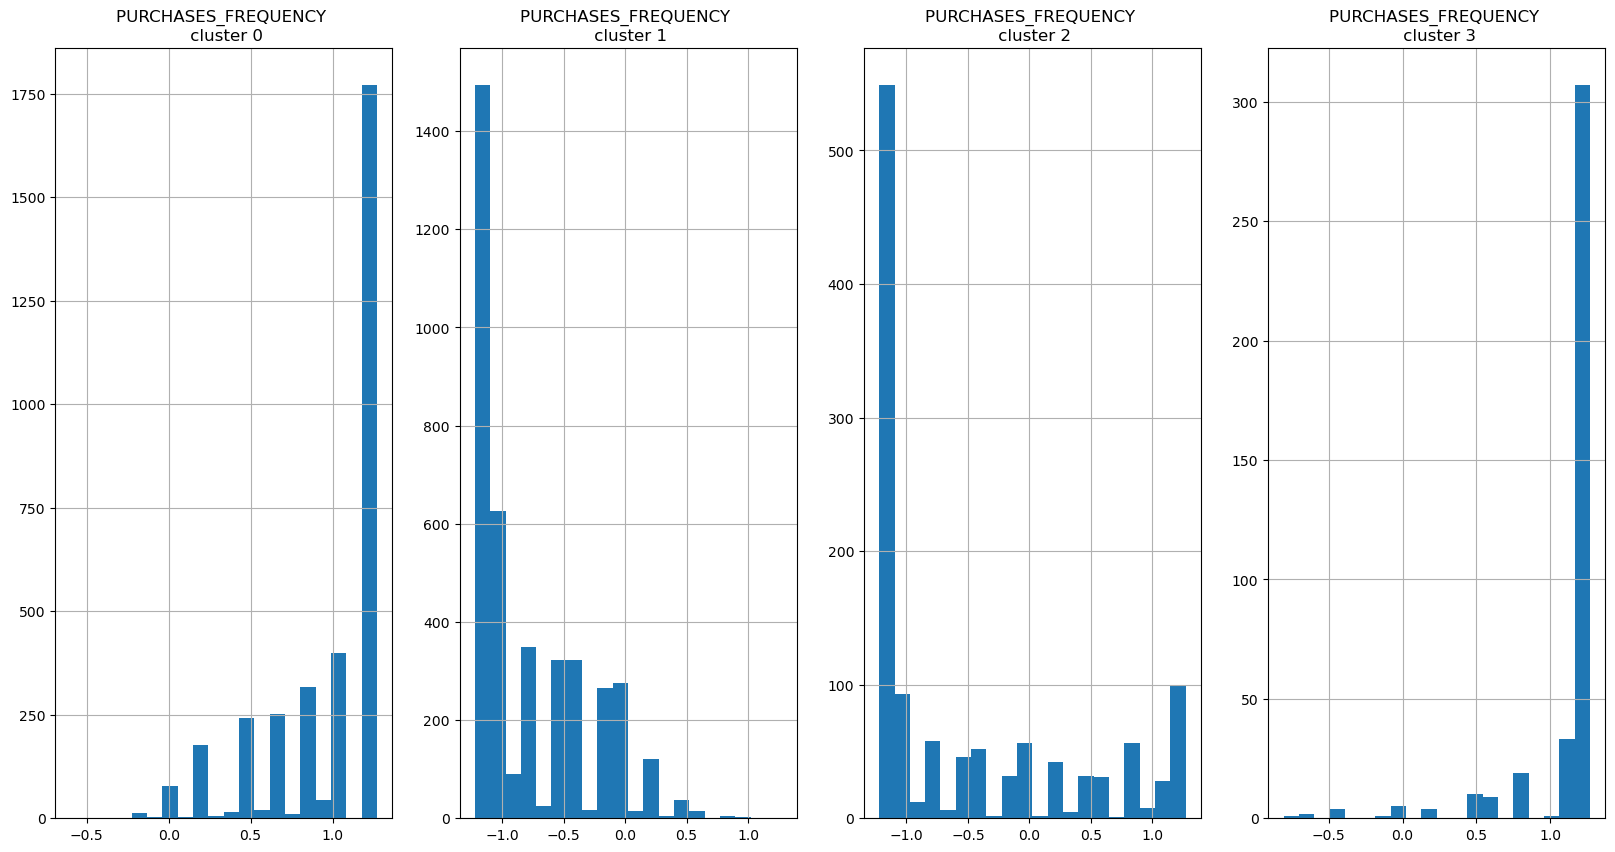

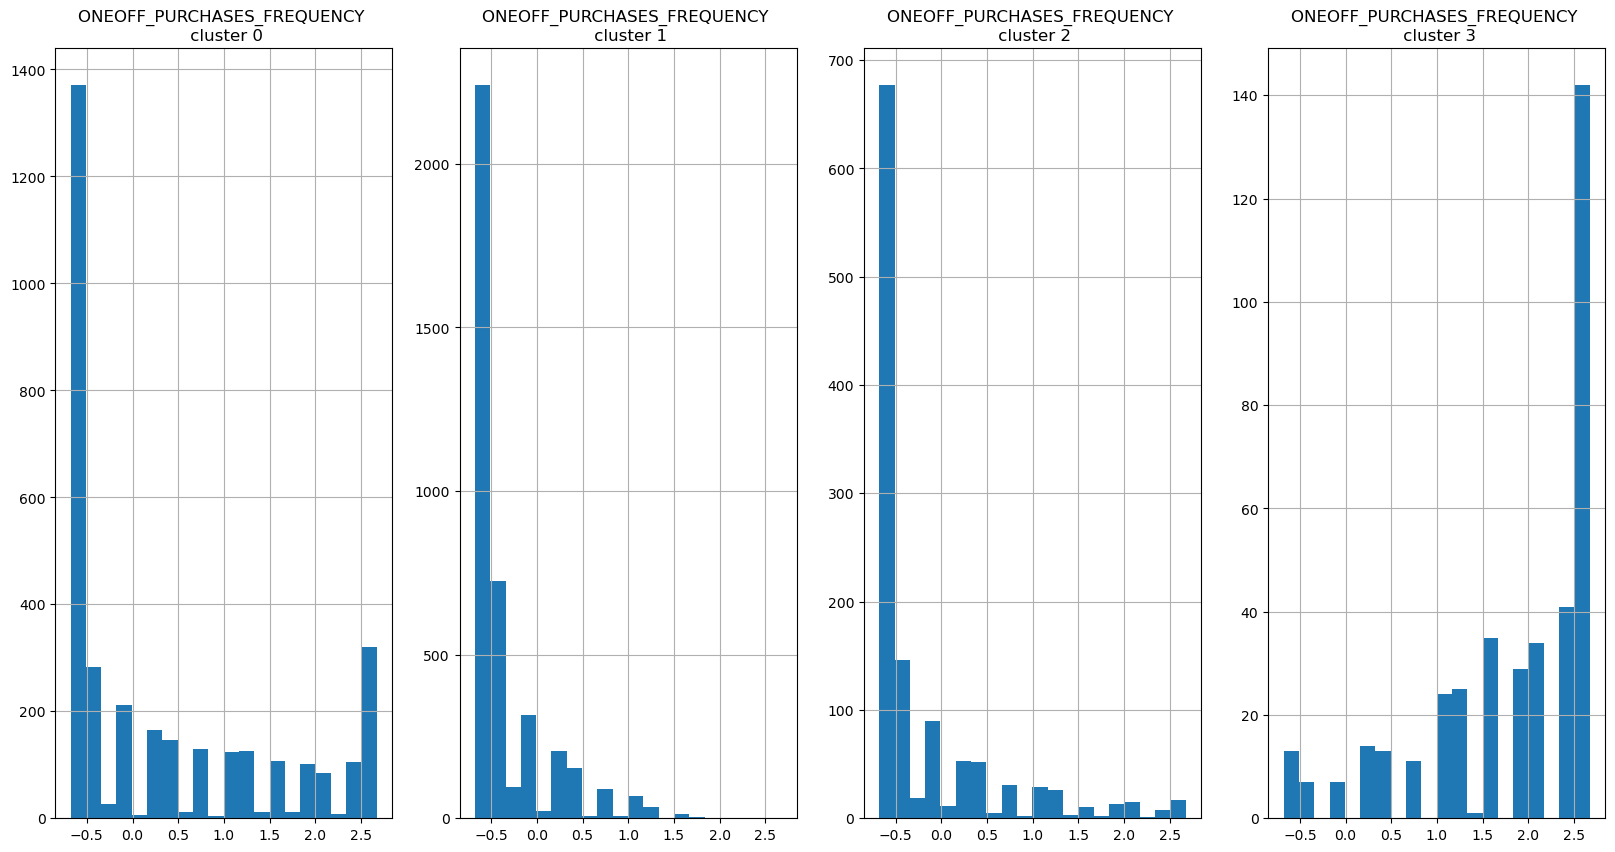

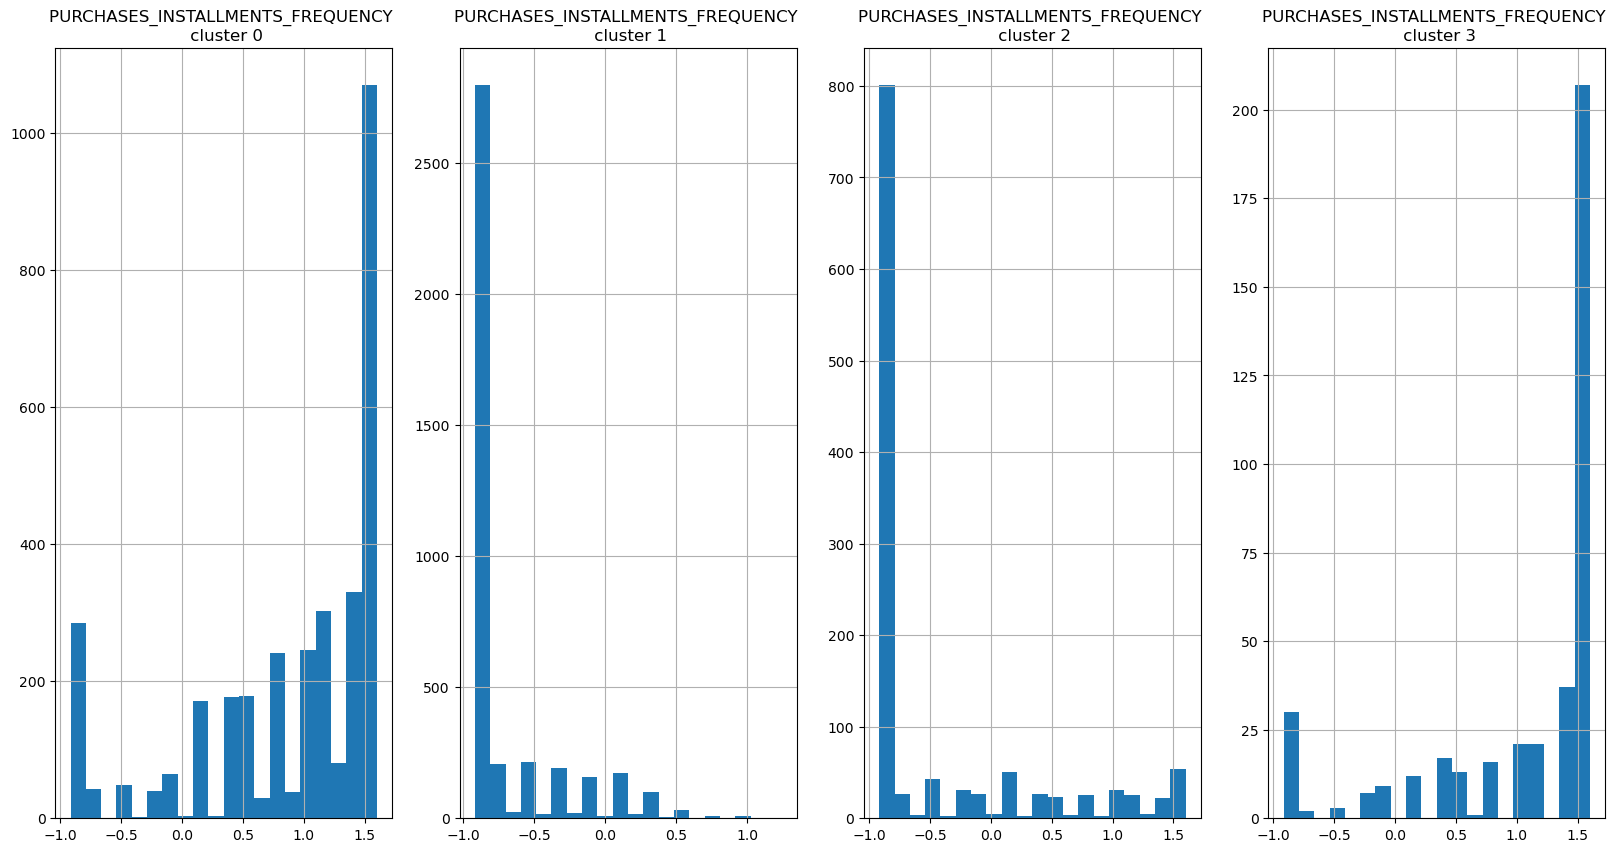

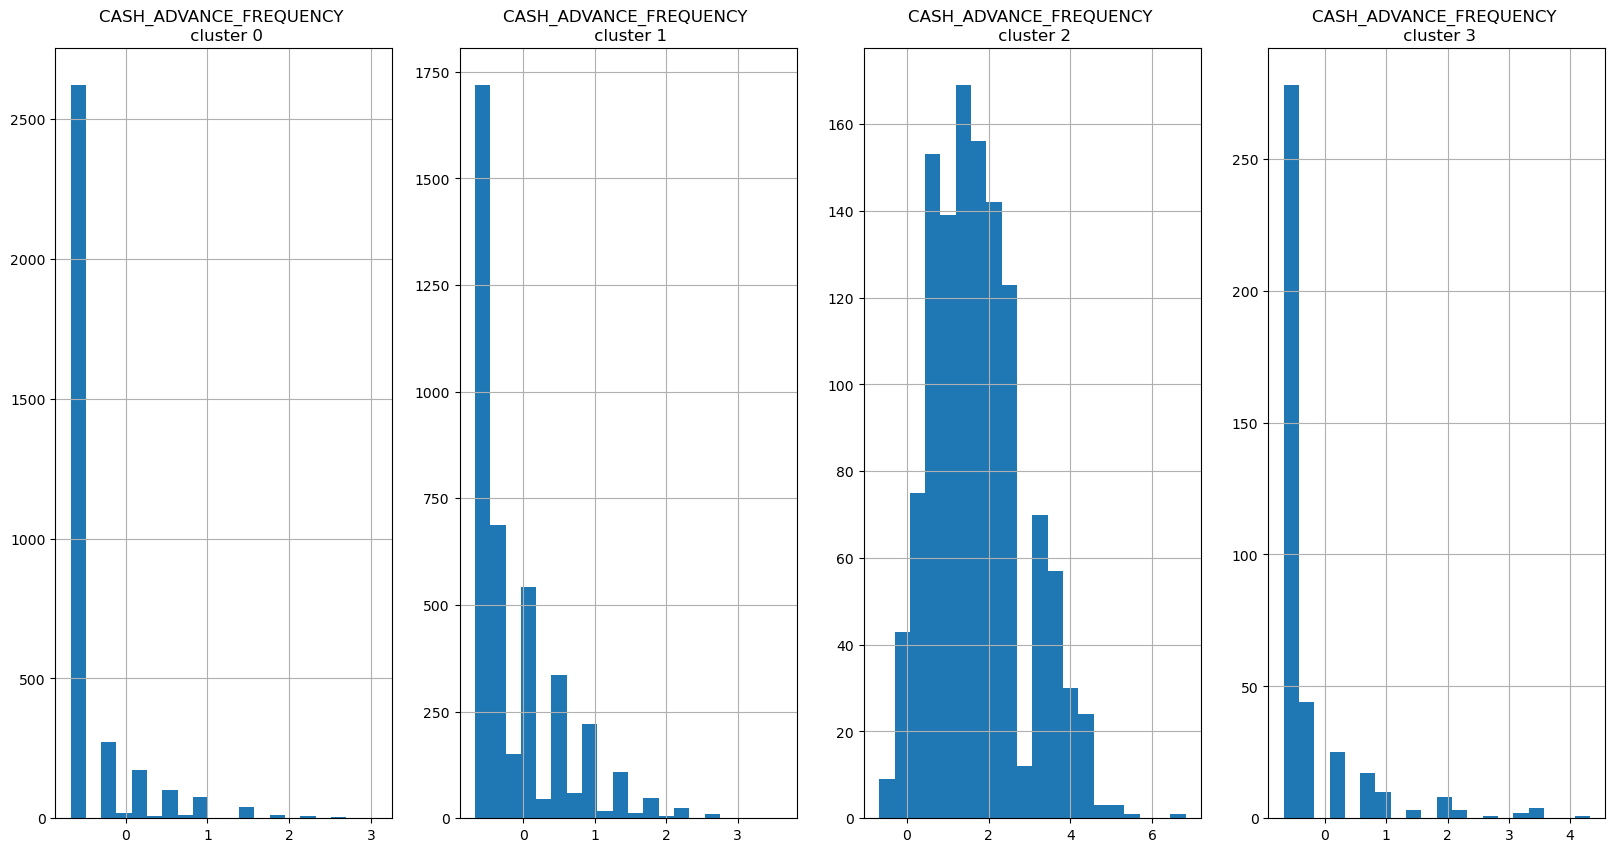

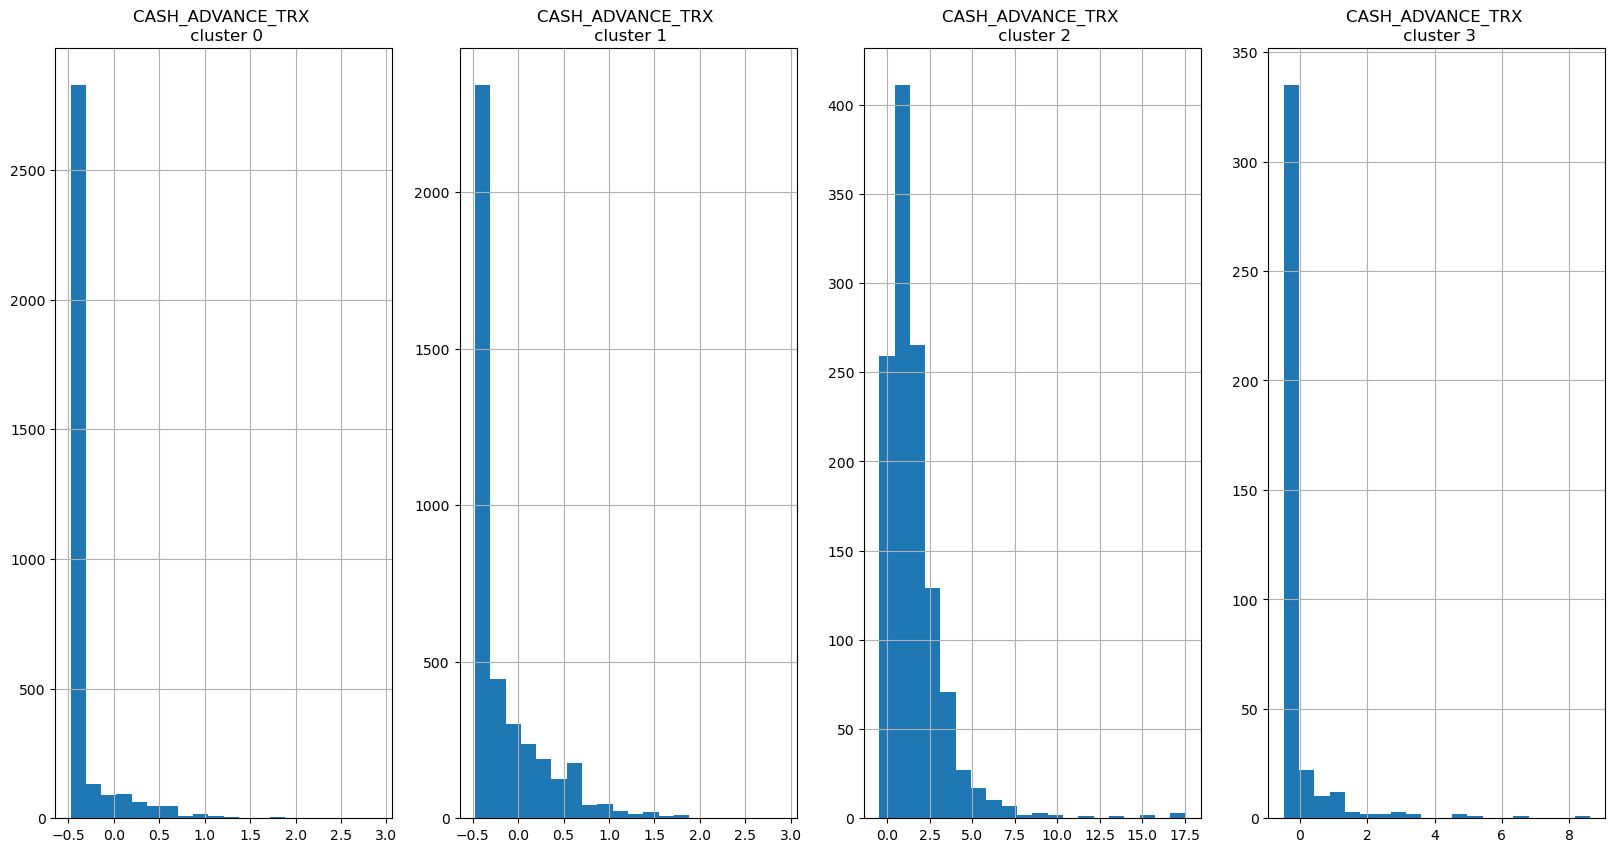

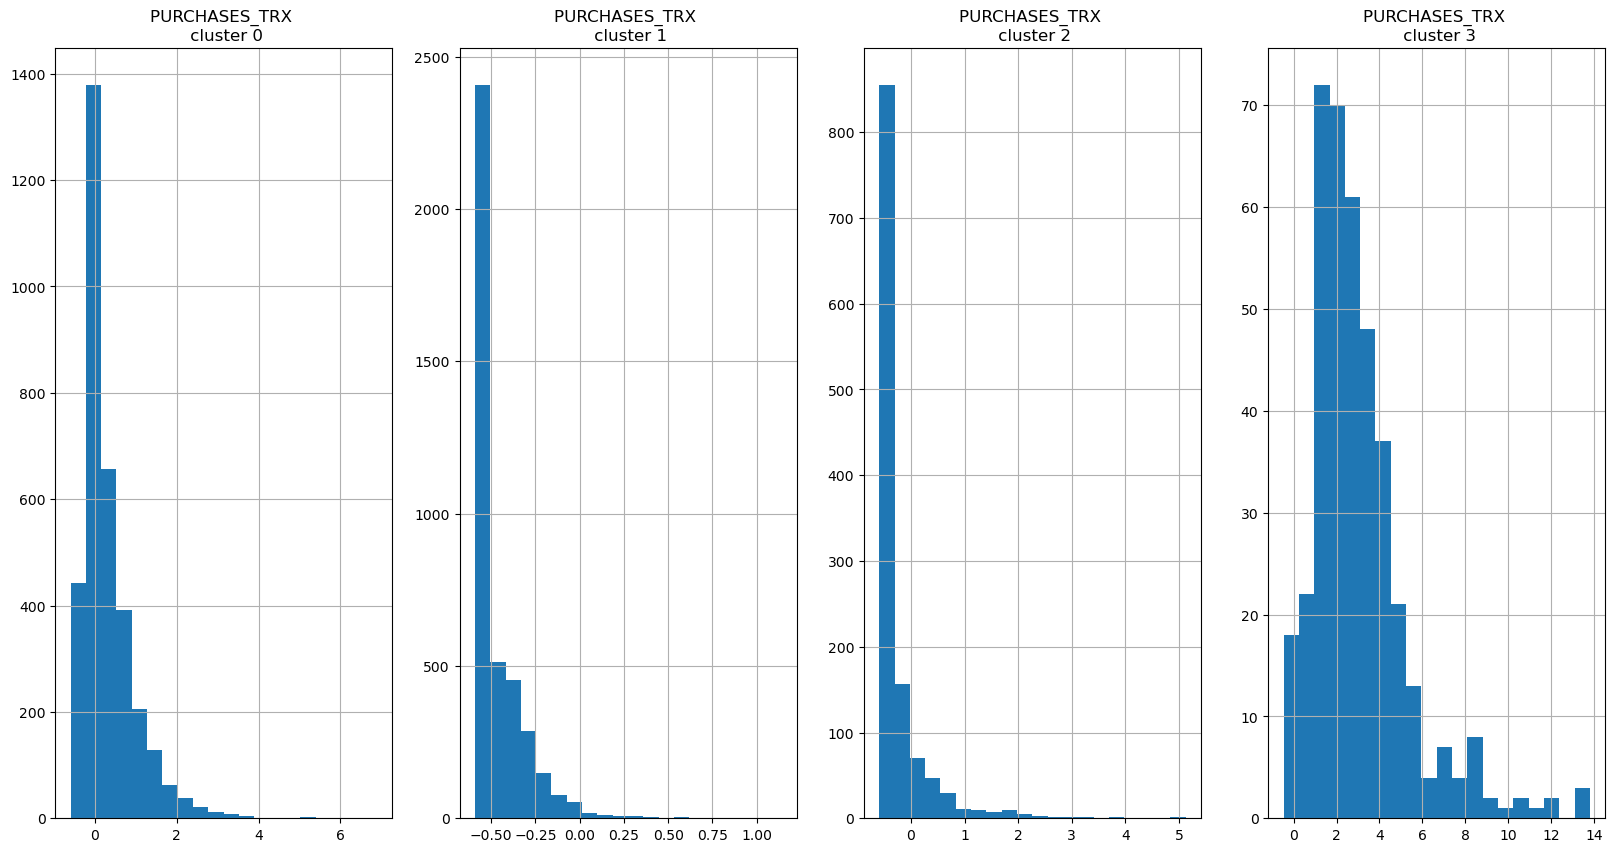

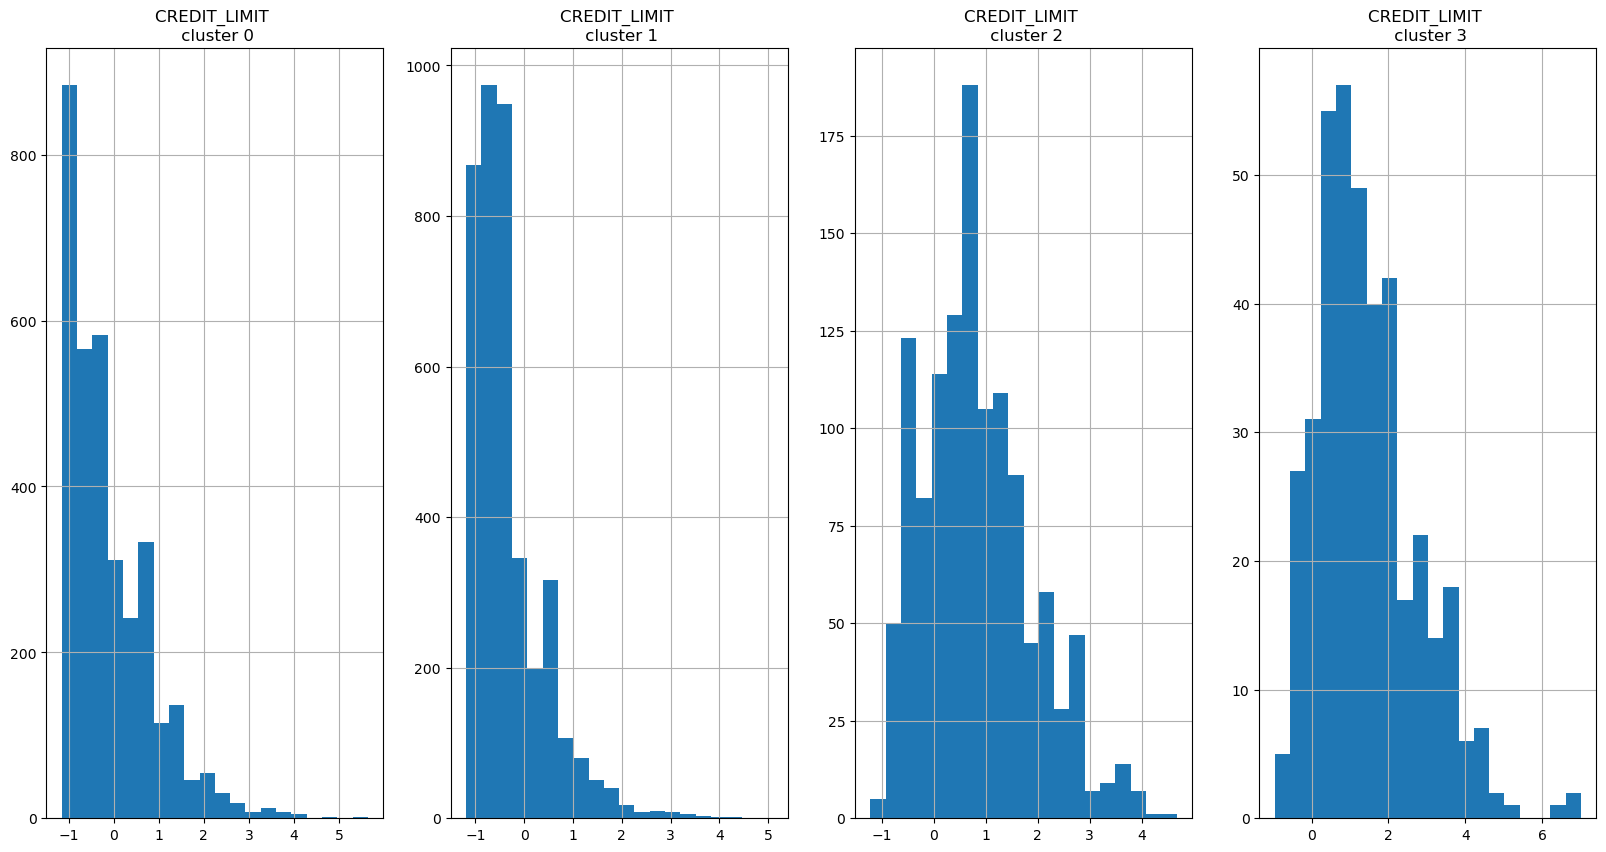

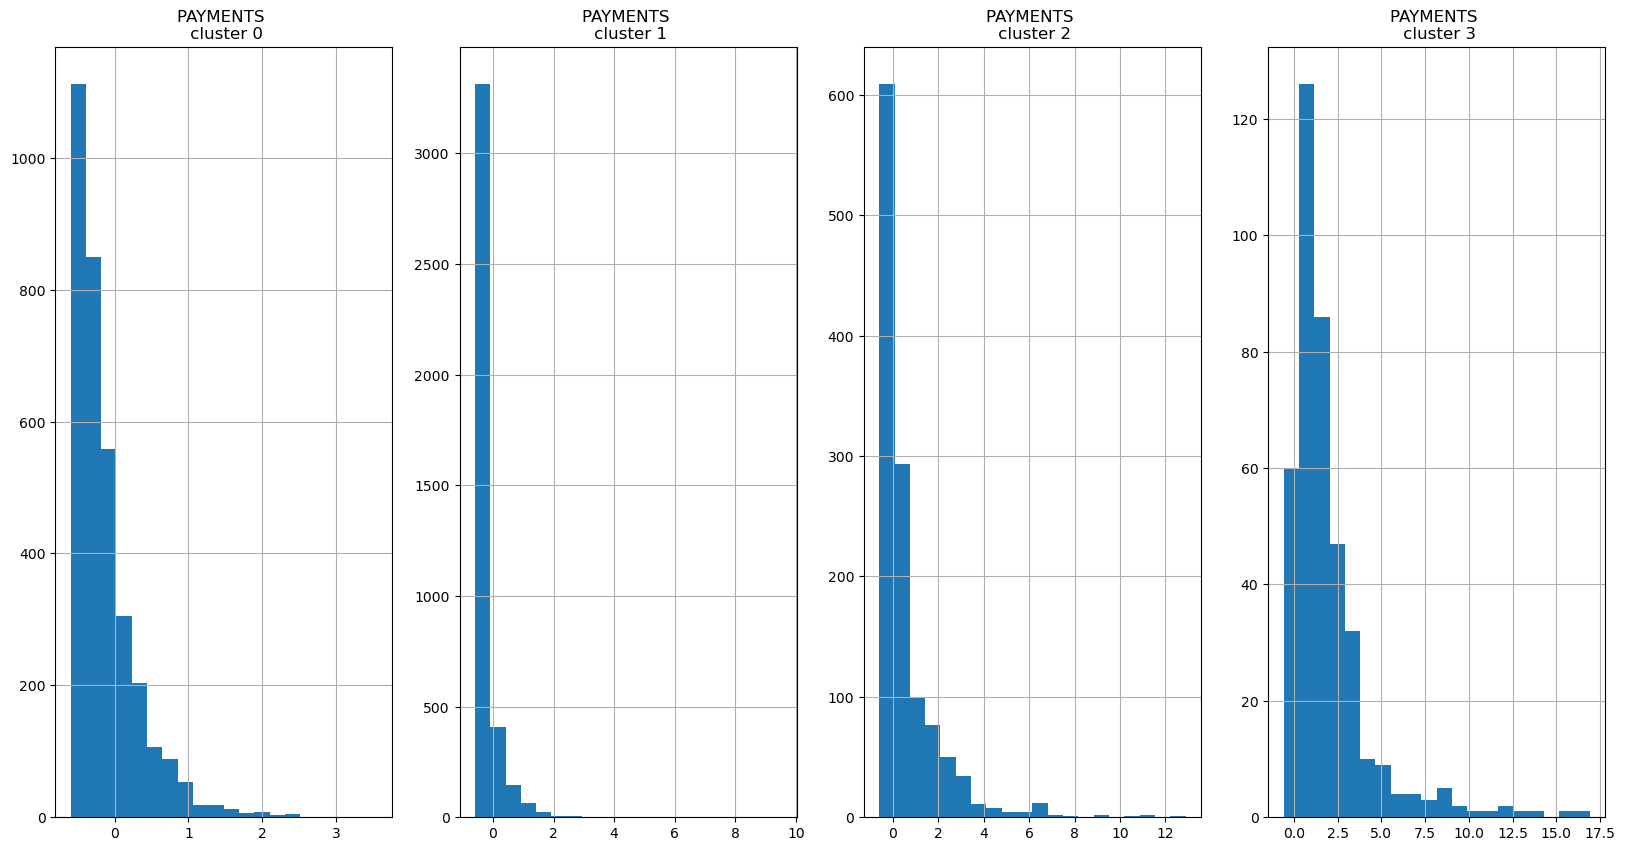

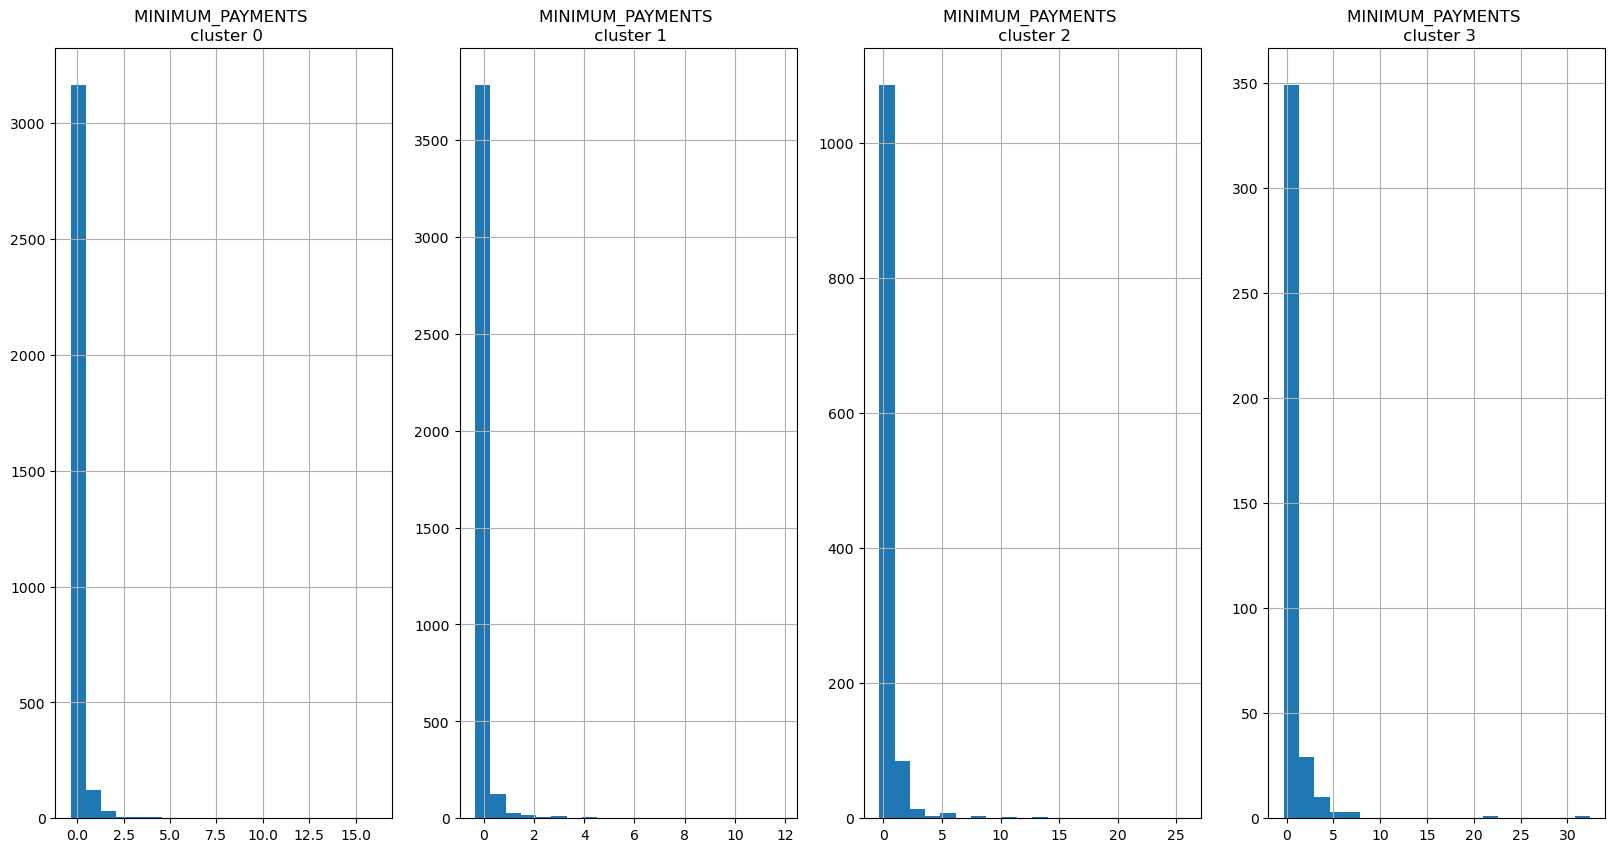

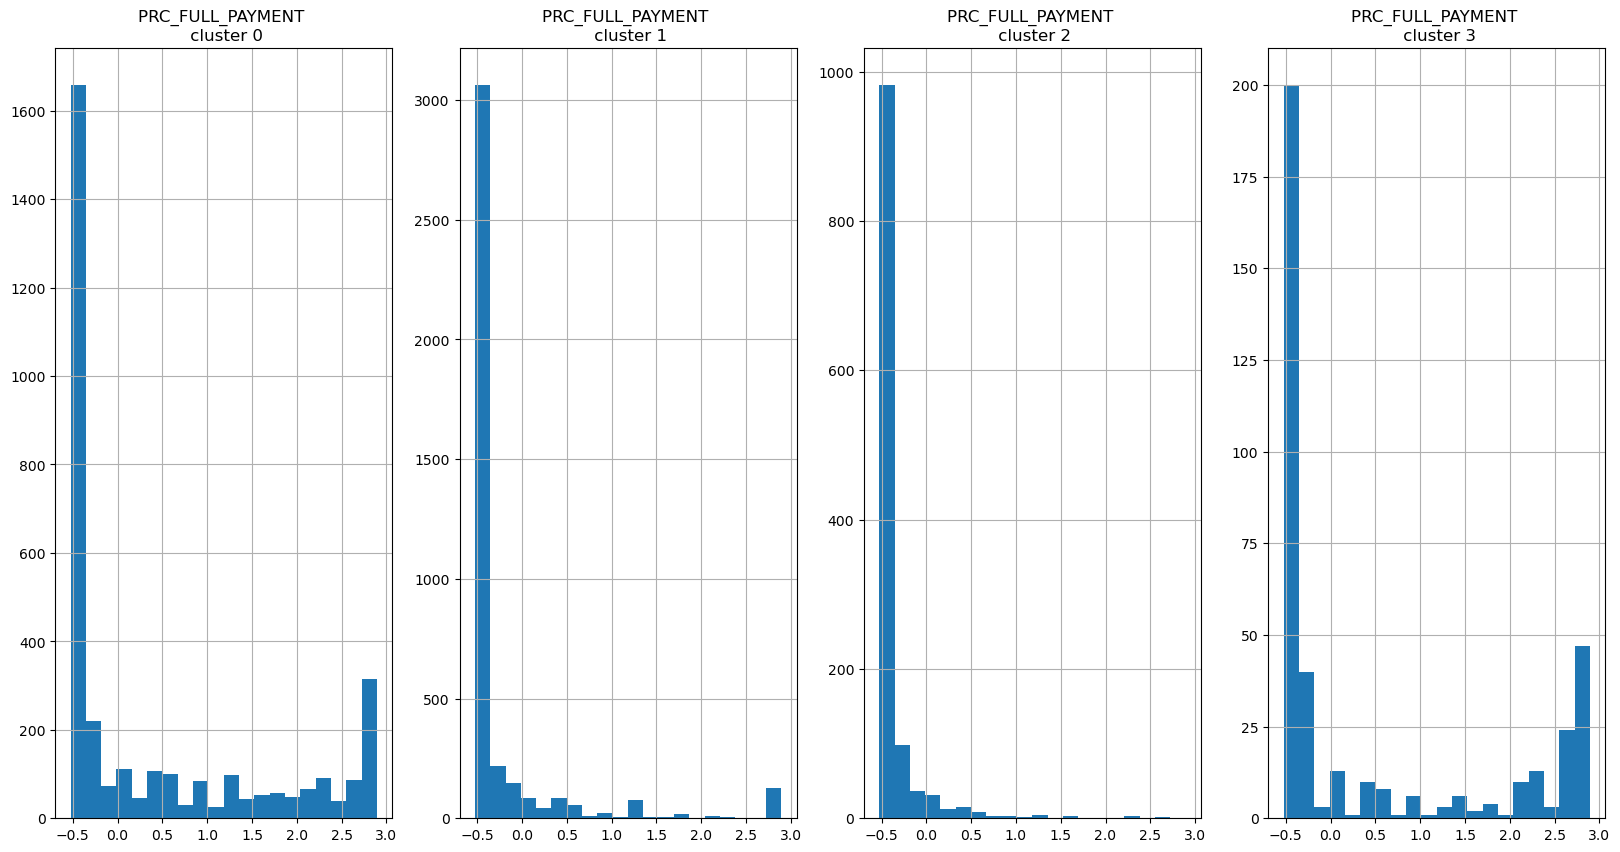

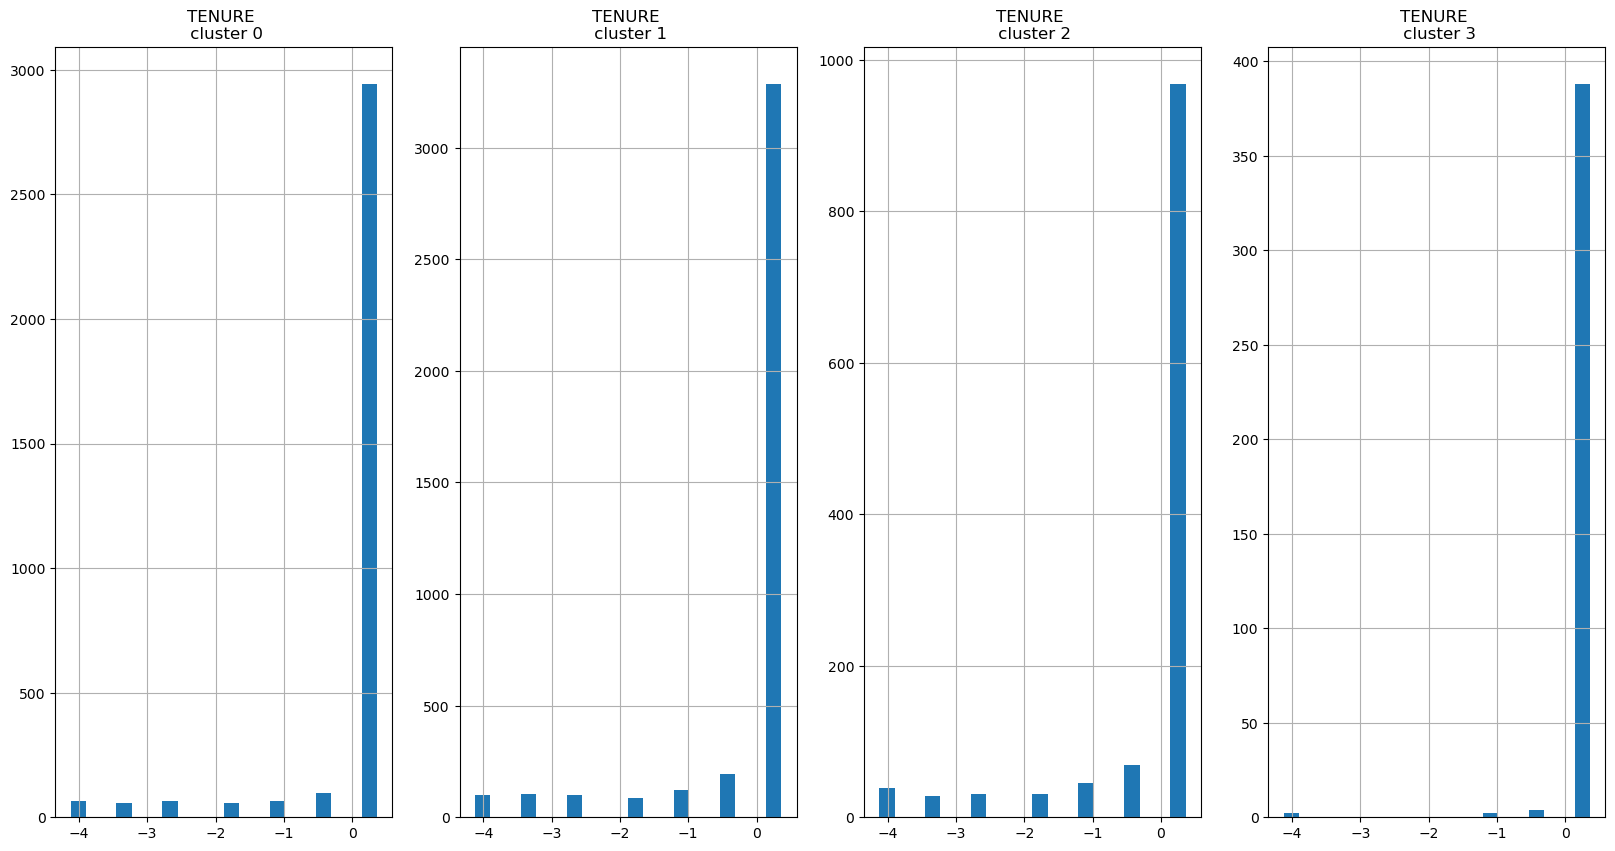

In [43]:
# plot histogram for various clusters
for i in df.columns:
    plt.figure(figsize=(20,10))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = dfc[dfc['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title(f'{i} \n cluster {j}')

the kmeans.cluster_centers_(attribute directly obtained from the scikit-learn K-Means clustering model) and kmeans_mean_cluster represent similar information, specifically the central tendency of each feature within each cluster

In [21]:
dx = df.copy()
dx

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960378   
1                   0.573963          0.110074      -0.591796      0.688678   
2                  -0.675349         -0.476070      -0.109020      0.826100   
3                  -0.258913         -0.329534      -0.551565      0.826100   
4                  -0.675349         -0.476070      -0.551565     -0.905410   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960378   
8946               -0.675349         -0.476070      -0.350408     -0.960378   
8947               -0.675349         -0.476070      -0.390639     -0.960378   
8948                0.157527         -0.182998      -0.591796     -1.097800   
8949                0.990398         -0.182998       0.333524     -0.905410   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979         -0.302400         -0.525551  0.360680  
1     0.818642          0.097500          0.234227  0.360680  
2    -0.383805         -0.093293         -0.525551  0.360680  
3    -0.598688         -0.228307         -0.525551  0.360680  
4    -0.364368         -0.257266         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217         -0.341250          1.183951 -4.122768  
8946 -0.503396         -0.228307         -0.525551 -4.122768  
8947 -0.570615         -0.326875          0.329200 -

In [22]:
# anaother way - 
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dx)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the df
g = og.copy()
g['cluster'] = cluster
g


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        3  
2      622.066742        627.284787          0.000000      12        4  
3        0.000000        312.343947          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        4  
89

In [24]:
#this code provides a summary of the mean values for each feature within each cluster resulting from the K-Means clustering. It can be helpful for understanding the characteristics of each cluster and identifying patterns or differences in feature values across clusters.
# do this on original df (non-standardized)
kmeans_mean_cluster = pd.DataFrame(round(g.groupby('cluster').mean(),1))
kmeans_mean_cluster

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
cluster                                                            
1         1012.7                0.8      270.0             209.9   
2         3551.2                1.0     7681.6            5095.9   
3         4602.4                1.0      501.9             320.2   
4          894.9                0.9     1236.2             594.0   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
1                          60.4         596.5                  0.2   
2                        2587.2         653.6                  0.9   
3                         181.8        4521.5                  0.3   
4                         642.5         210.6                  0.9   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
1                               0.1                               0.1   
2                               0.7                               0.8   
3                               0.1                               0.2   
4                               0.3                               0.7   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
1                           0.1               2.1            2.9   
2                           0.1               2.1           89.4   
3                           0.5              14.3            7.7   
4                           0.0               0.8           22.1   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
cluster                                                                      
1              3278.6     974.3             553.9               0.1    11.4  
2              9696.9    7288.7            1972.8               0.3    12.0  
3              7546.2    3484.1            2003.7               0.0    11.4  
4              4213.2    1332.2             639.7               0.3    11.6

0

# TASK 6: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [46]:
# Obtain the principal components
pca = PCA(n_components=2)
pcom = pca.fit_transform(df)
pcom

array([[-1.68364786, -1.07223902],
       [-1.13408504,  2.50915678],
       [ 0.96939096, -0.38358471],
       ...,
       [-0.92898337, -1.80804776],
       [-2.33784132, -0.65360849],
       [-0.55802717, -0.40064948]])

In [47]:
# Create a dataframe with the two components
pc_df = pd.DataFrame(data=pcom,columns=['pca1','pca2'])
pc_df.head()

pca1      pca2
0 -1.683648 -1.072239
1 -1.134085  2.509157
2  0.969391 -0.383585
3 -0.888221  0.004651
4 -1.600020 -0.683794

In [49]:
# Concatenate the clusters labels to the dataframe
pc_df = pd.concat([pc_df,pd.DataFrame({'cluster':labels})],axis=1)
pc_df.head()

pca1      pca2  cluster
0 -1.683648 -1.072239        1
1 -1.134085  2.509157        2
2  0.969391 -0.383585        0
3 -0.888221  0.004651        1
4 -1.600020 -0.683794        1

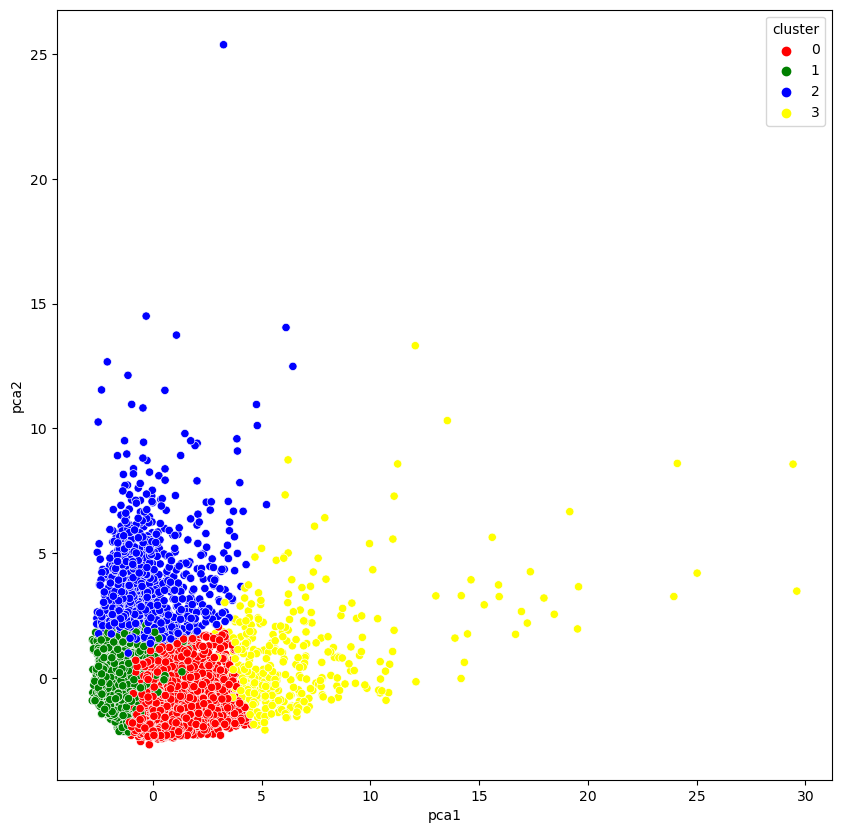

In [50]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pc_df,palette=['red','green','blue','yellow'])

# TASK #7: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [25]:
from tensorflow.keras.layers import Input,Add,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,AveragePooling2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Model,load_model
import tensorflow as tf
from keras.optimizers import SGD

In [26]:
input_df = Input(shape=(17,))
x = Dense(7,activation='relu')(input_df)
x = Dense(300,activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(300,activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)

encoder = Dense(10,activation='relu',kernel_initializer='glorot_uniform')(x)

x = Dense(500,activation='relu',kernel_initializer='glorot_uniform')(encoder)
x = Dense(300,activation='relu',kernel_initializer='glorot_uniform')(x)

decoder = Dense(17,kernel_initializer='glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df,decoder)
#encoder
encoder = Model(input_df,encoder)

autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
df.shape

(8950, 17)

In [28]:
autoencoder.fit(df,df,batch_size=128,epochs=25,verbose=1)

Epoch 1/25

70/70 [==============================] - 2s 9ms/step - loss: 0.5831
Epoch 2/25
70/70 [==============================] - 1s 9ms/step - loss: 0.3190
Epoch 3/25
70/70 [==============================] - 1s 9ms/step - loss: 0.2443
Epoch 4/25
70/70 [==============================] - 1s 9ms/step - loss: 0.2079
Epoch 5/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1781
Epoch 6/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1655
Epoch 7/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1485
Epoch 8/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1360
Epoch 9/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1317
Epoch 10/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1237
Epoch 11/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1191
Epoch 12/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1084
Epoch 13/25
70/70 [=============================

In [29]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 300)               2400      
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 500)               150500    
                                                                 
 dense_4 (Dense)             (None, 10)                5010      
                                                                 
 dense_5 (Dense)             (None, 500)               5500  

In [30]:
pred = encoder.predict(df)

280/280 [==============================] - 1s 2ms/step


In [31]:
pred.shape

(8950, 10)

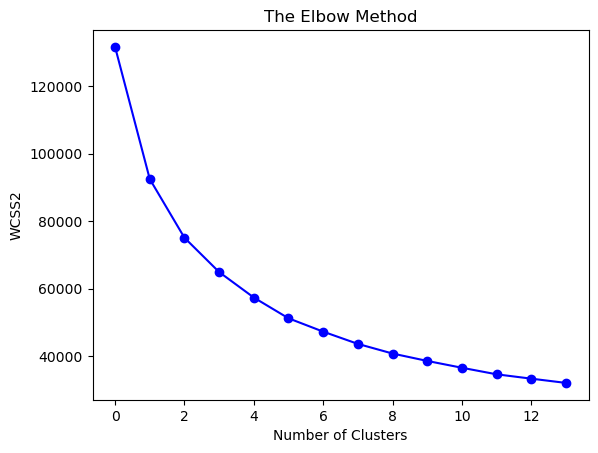

In [67]:
wcss2=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(pred)
    wcss2.append(kmeans.inertia_)

# plt.plot(range(1,15),wcss)
plt.plot(wcss2,'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS2')
plt.show()

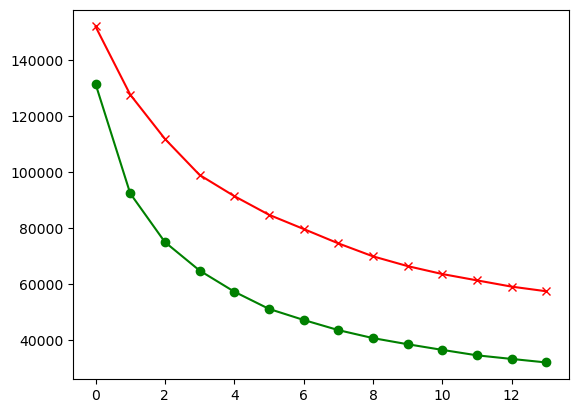

In [70]:
plt.plot(wcss,'bx-',color='r')
plt.plot(wcss2,'bo-',color='g')

In [40]:
kmeans = KMeans(3)
kmeans.fit(pred)
labelx = kmeans.labels_

In [41]:
labelx

array([0, 0, 1, ..., 1, 1, 1])

In [42]:
df_cls = pd.concat([og,pd.DataFrame({'cluster2':labelx})],axis=1)
df_cls

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster2  
0      201.802084        139.509787          0.000000      12         0  
1     4103.032597       1072.340217          0.222222      12         0  
2      622.066742        627.284787          0.000000      12         1  
3        0.000000        312.343947          0.000000      12         0  
4      678.334763        244.791237          0.000000      12         0  
...           ...               ...               ...     ...       ...  
8945   325.594462         48.886365          0.500000       6       

In [43]:
pca = PCA(n_components=2)
pr = pca.fit_transform(pred)
pc_d = pd.DataFrame(data=pr,columns=['pca1','pca2'])
pc_d

pca1      pca2
0    -3.433906 -0.035890
1     0.436064  2.786681
2     4.277231 -0.514383
3     0.091867  0.701163
4    -3.033675 -0.070851
...        ...       ...
8945  2.216964 -1.258943
8946  1.293016 -0.463153
8947  1.553030 -0.612162
8948  1.304086  1.489787
8949  6.752738  1.137556

[8950 rows x 2 columns]

In [44]:
pc_d = pd.concat([pc_d,pd.DataFrame({'cluster2':labelx})],axis=1)
pc_d.head()

pca1      pca2  cluster2
0 -3.433906 -0.035890         0
1  0.436064  2.786681         0
2  4.277231 -0.514383         1
3  0.091867  0.701163         0
4 -3.033675 -0.070851         0

In [45]:
pc_d['cluster2'].value_counts()

cluster2
0    6125
1    2612
2     213
Name: count, dtype: int64

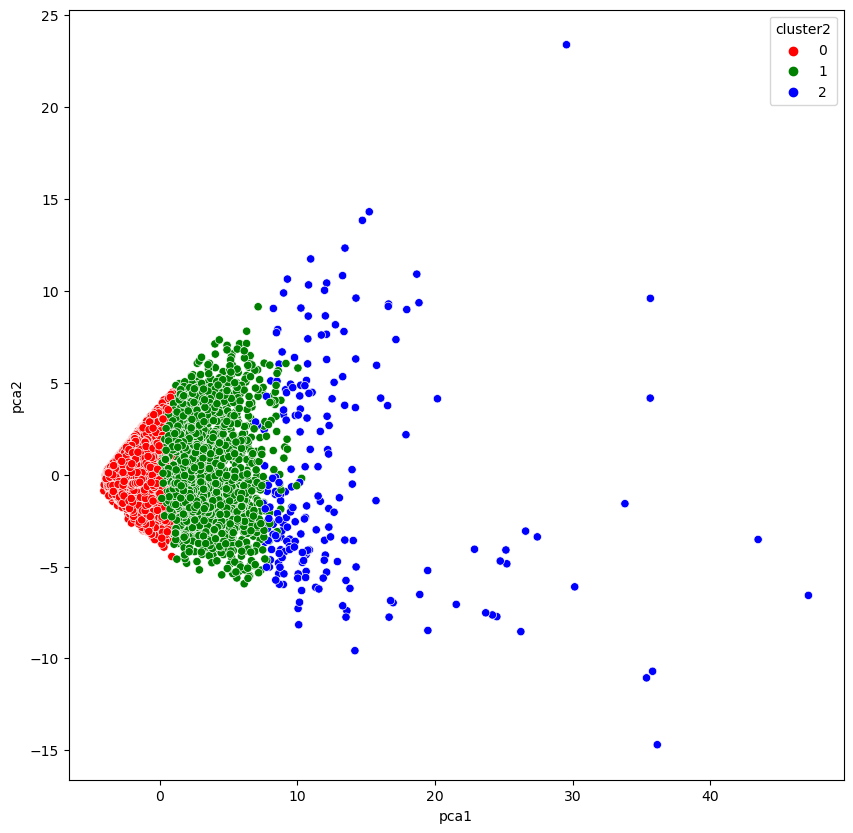

In [46]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster2',data=pc_d,palette=['red','green','blue'])